In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, kruskal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|", low_memory=False)
print(data.head())

# Data Summarization
descriptive_stats = data.describe()
print(descriptive_stats)


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

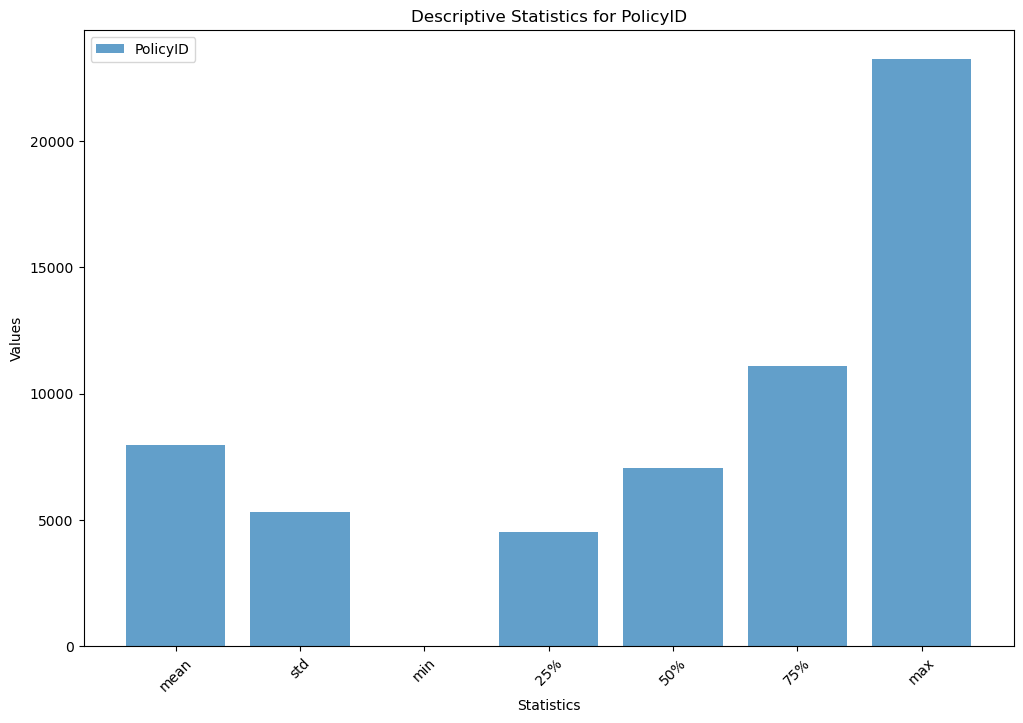

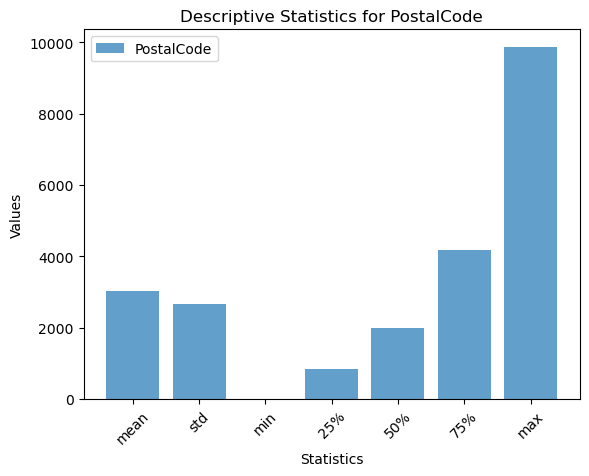

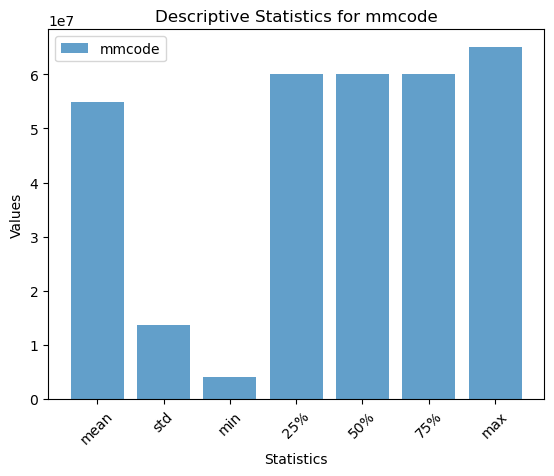

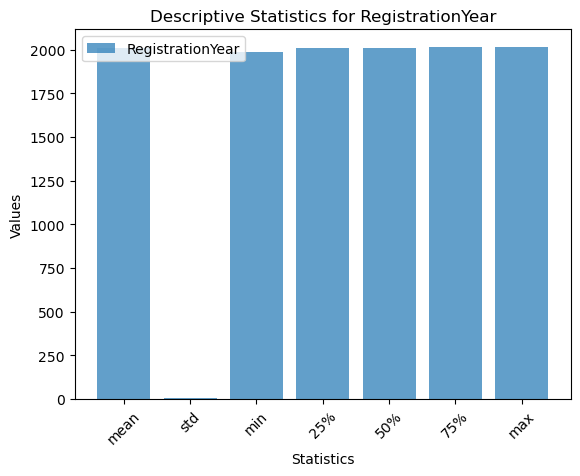

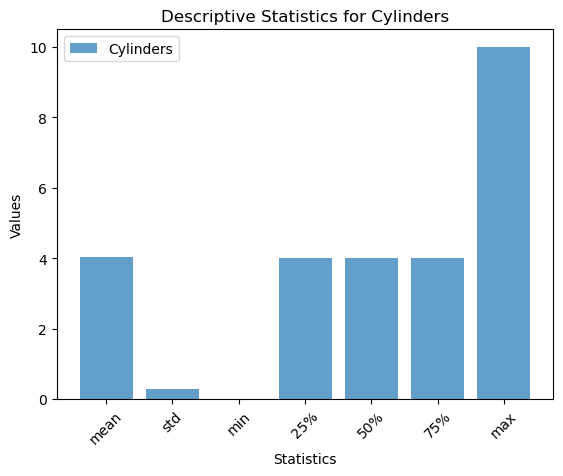

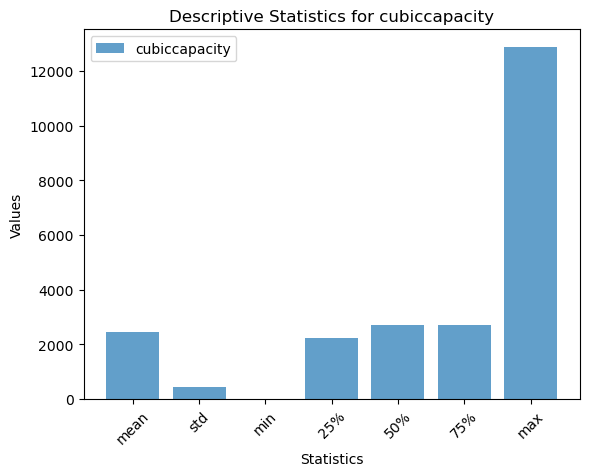

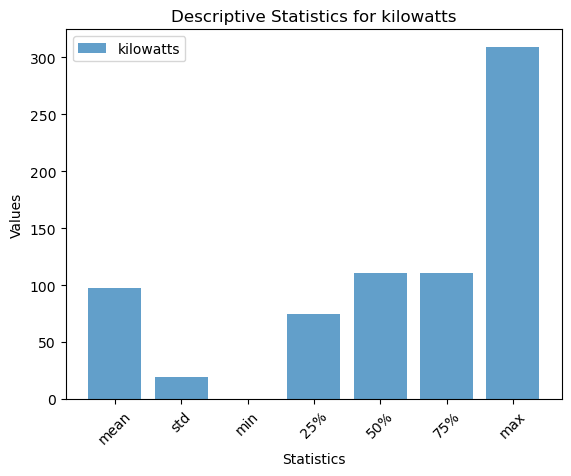

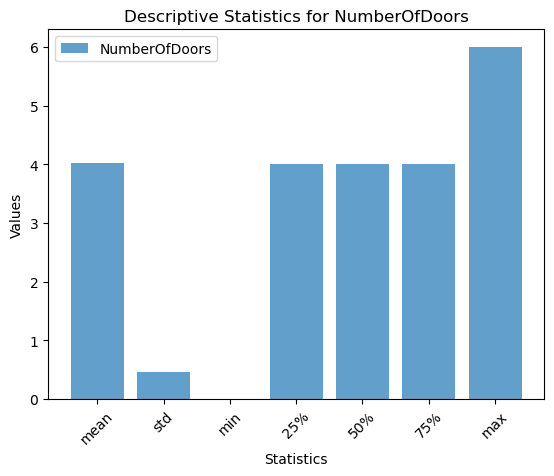

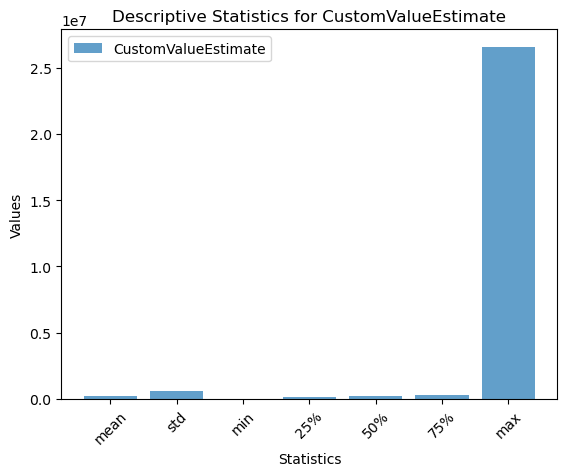

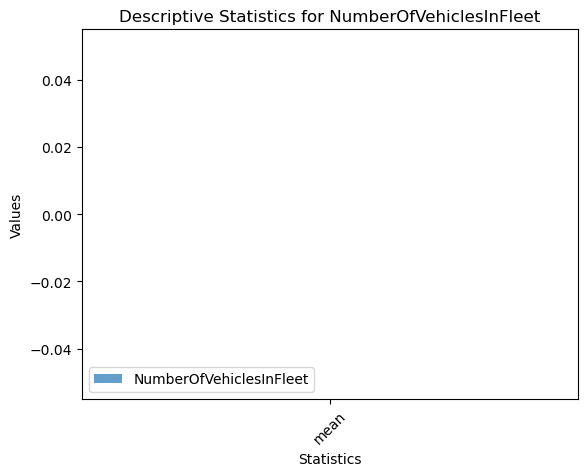

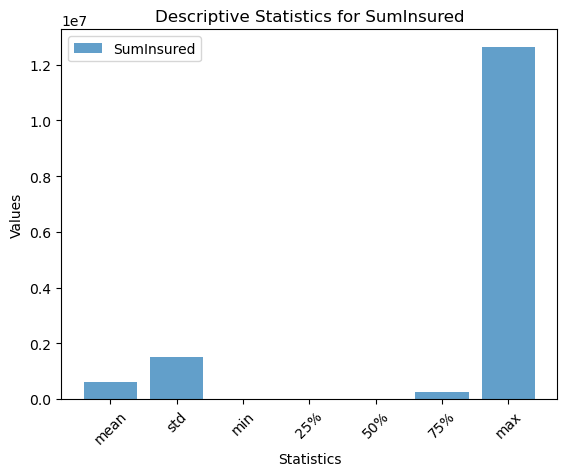

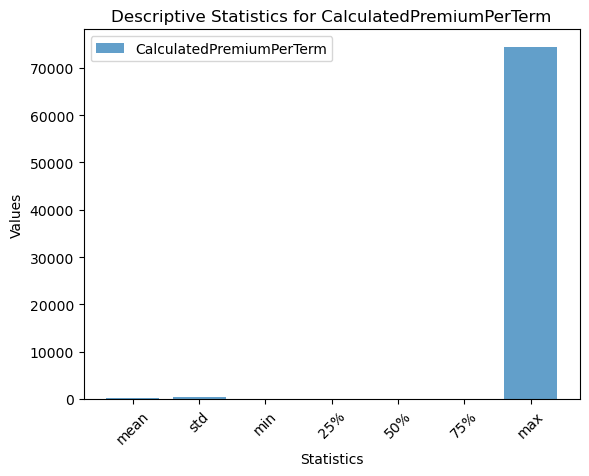

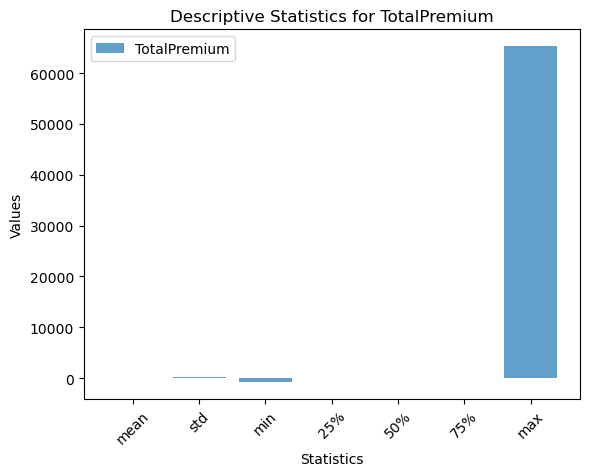

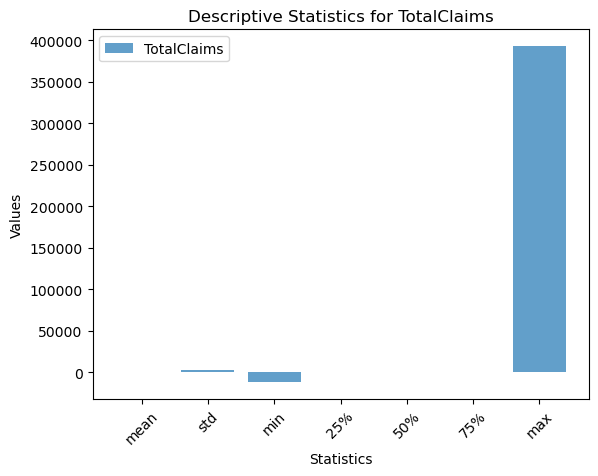

In [4]:
# Extract the columns and values for plotting
columns = descriptive_stats.columns
values = descriptive_stats.values[1:]

# Define x-axis labels
x_labels = descriptive_stats.index[1:]

# Plotting
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns[1:], start=1):  # Start from the second column
    plt.bar(x_labels, values[:, i], alpha=0.7, label=col)
    plt.title(f'Descriptive Statistics for {col}')
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [5]:
print("\nData Structure:")
print(data.dtypes)

# Data Quality Assessment
print("\nMissing Values:")
print(data.isnull().sum())


Data Structure:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoo

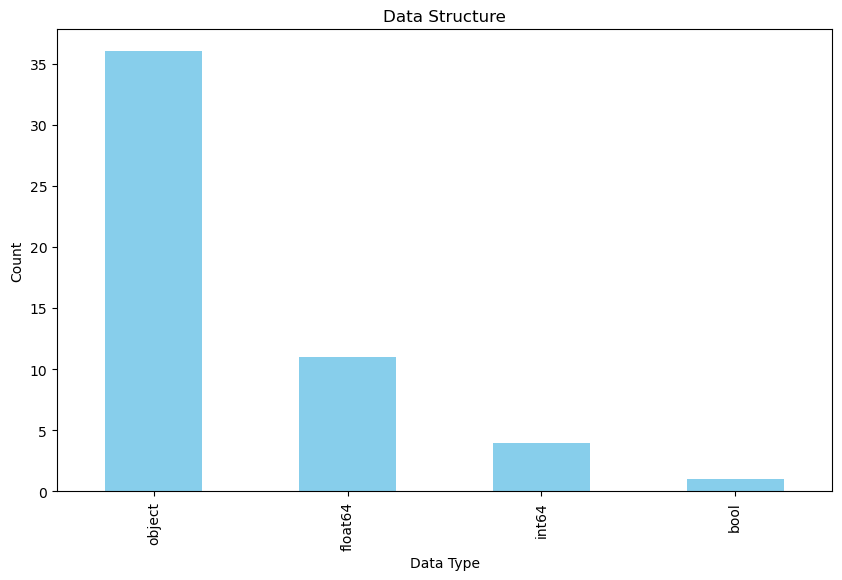

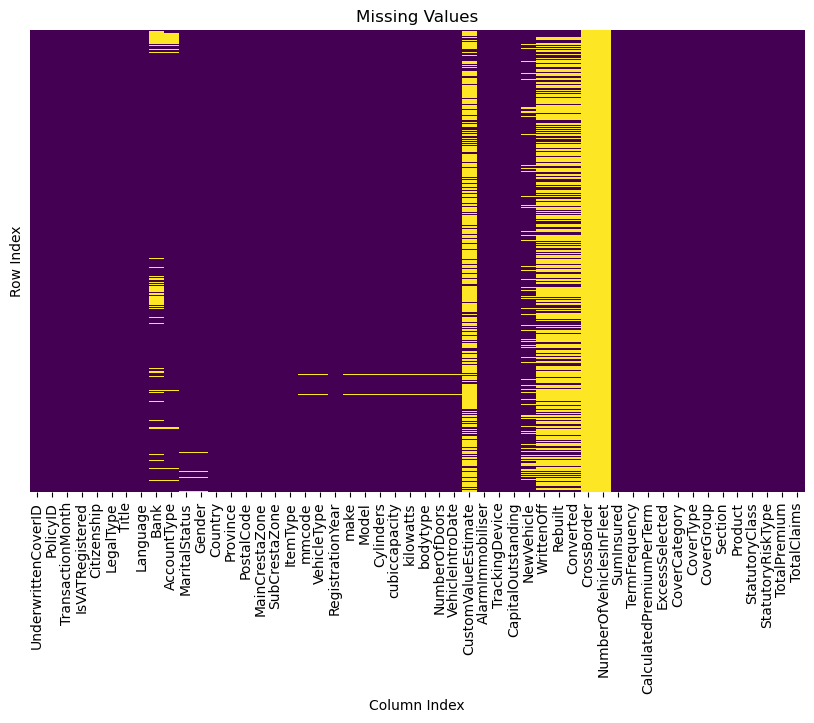

In [6]:
# Data Structure
plt.figure(figsize=(10, 6))
data.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Data Structure')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

# Data Quality Assessment
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


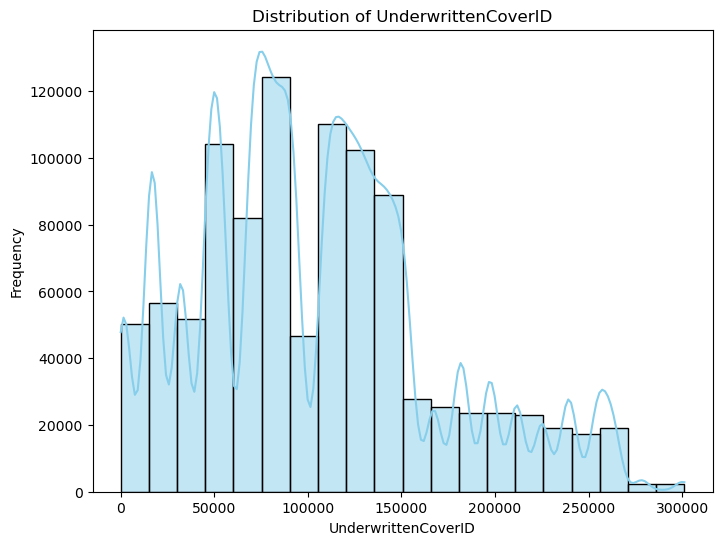

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


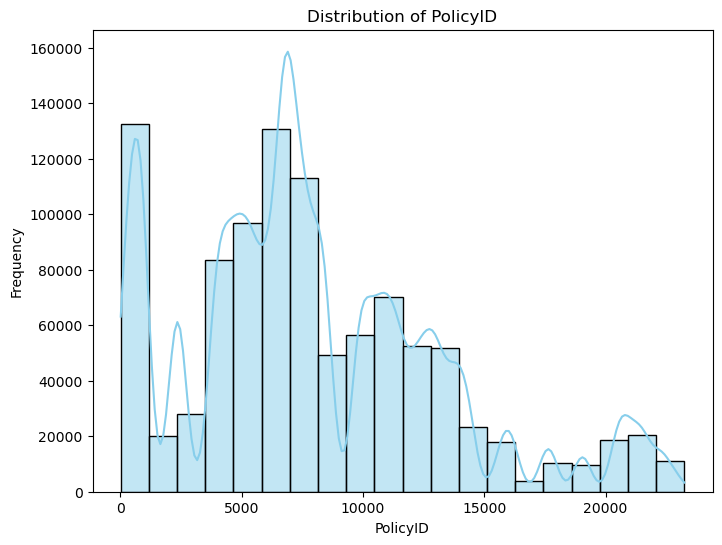

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


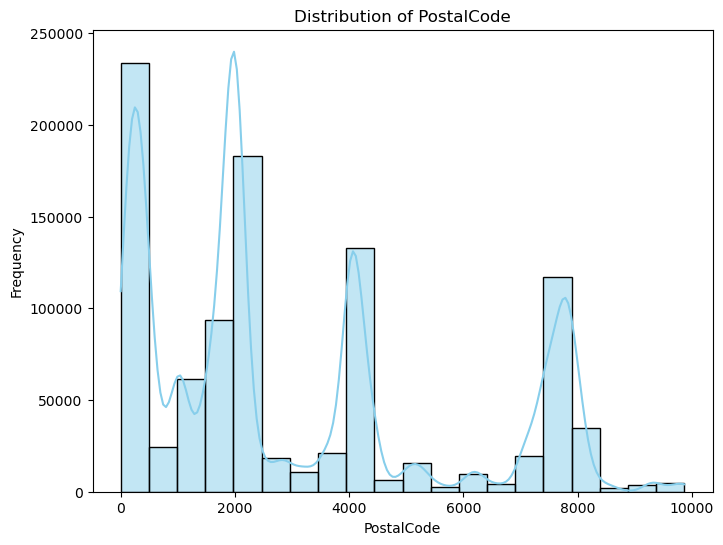

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


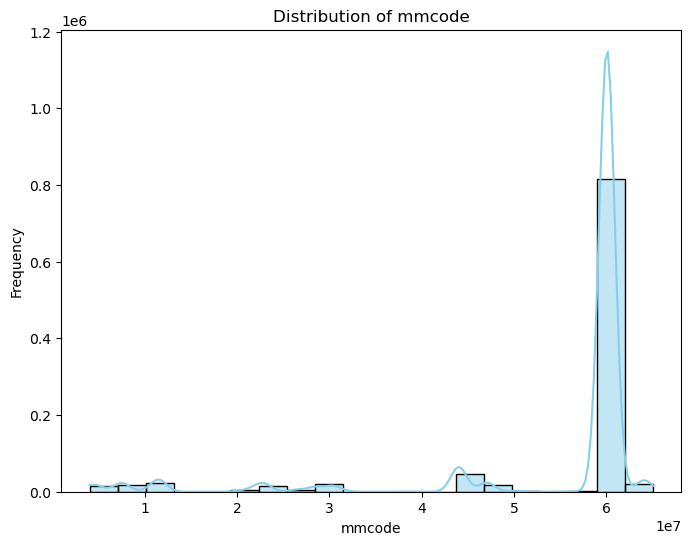

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


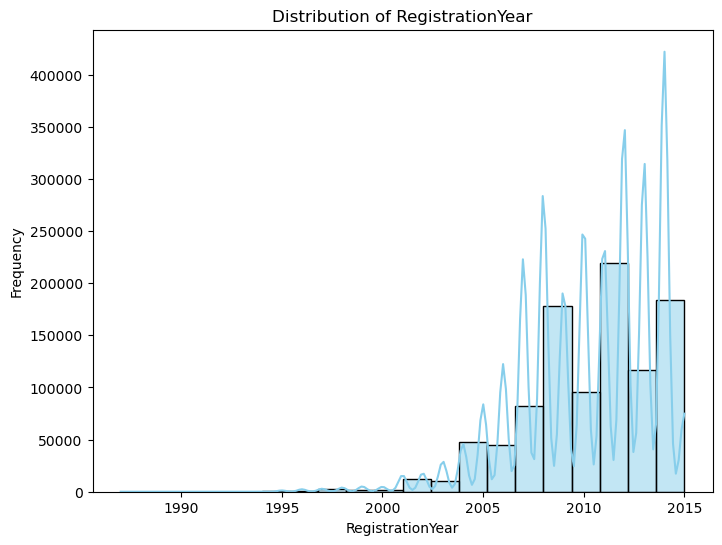

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


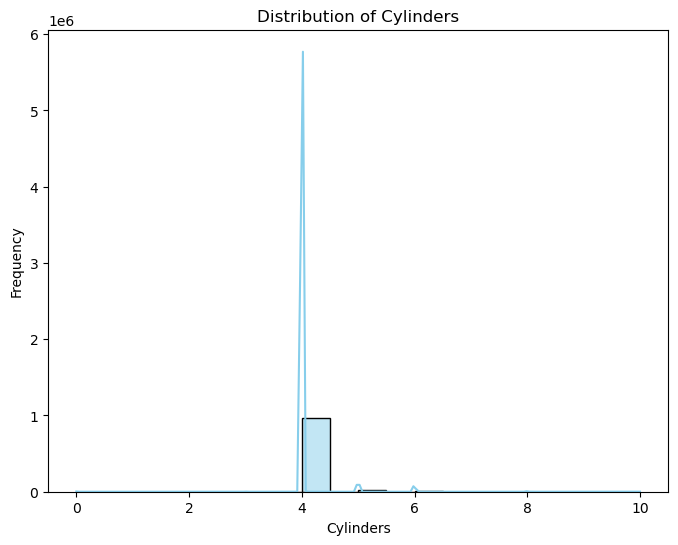

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


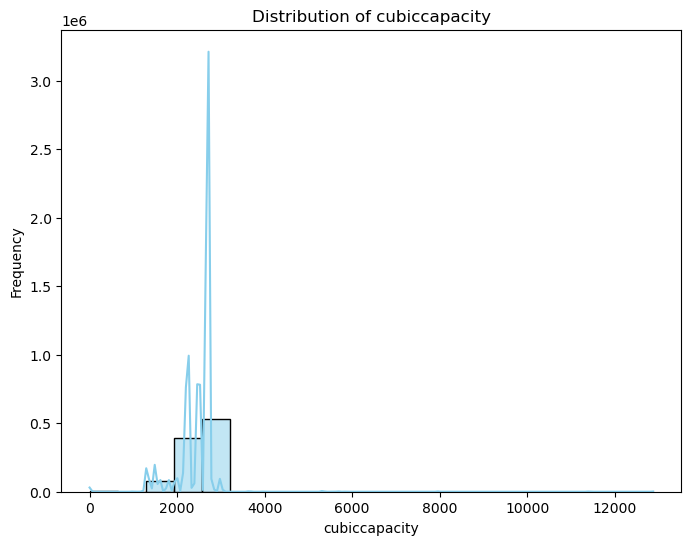

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


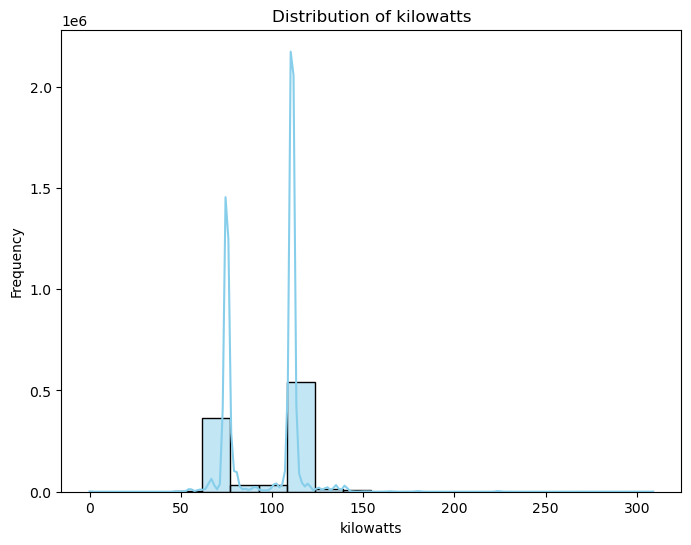

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


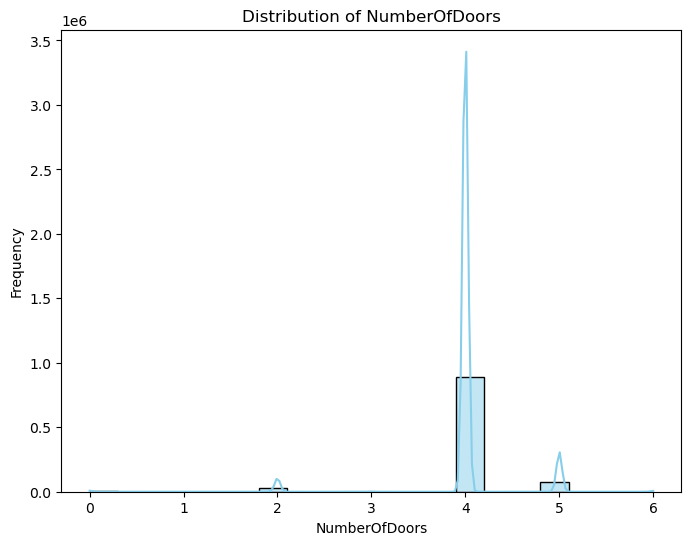

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


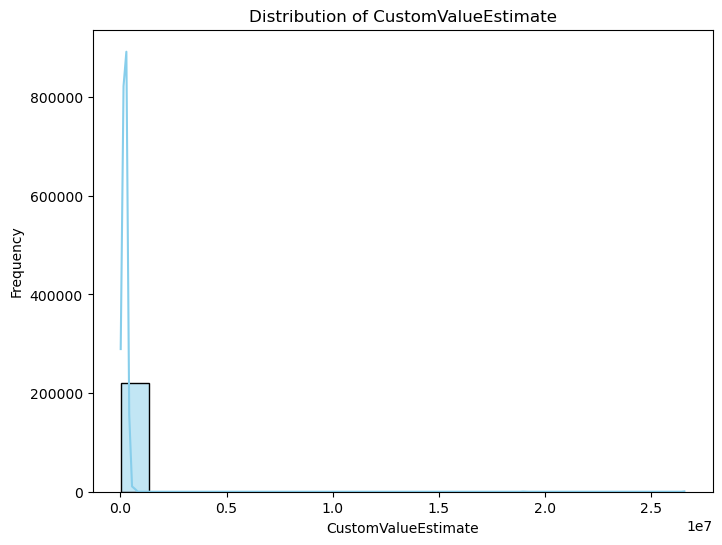

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


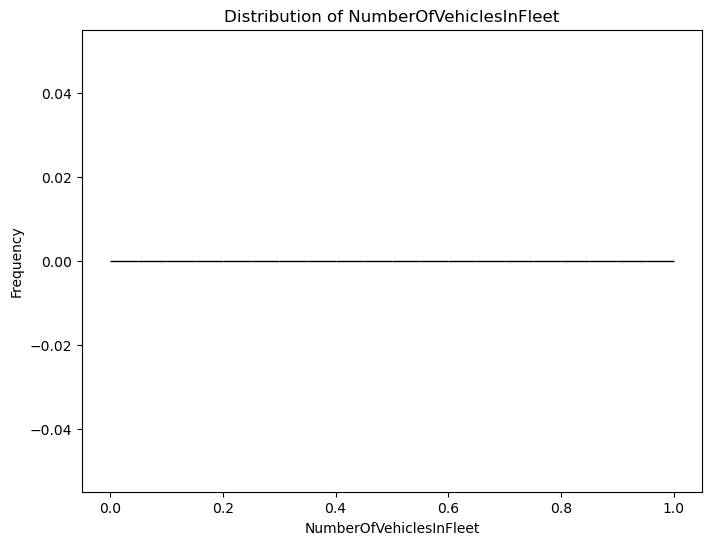

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


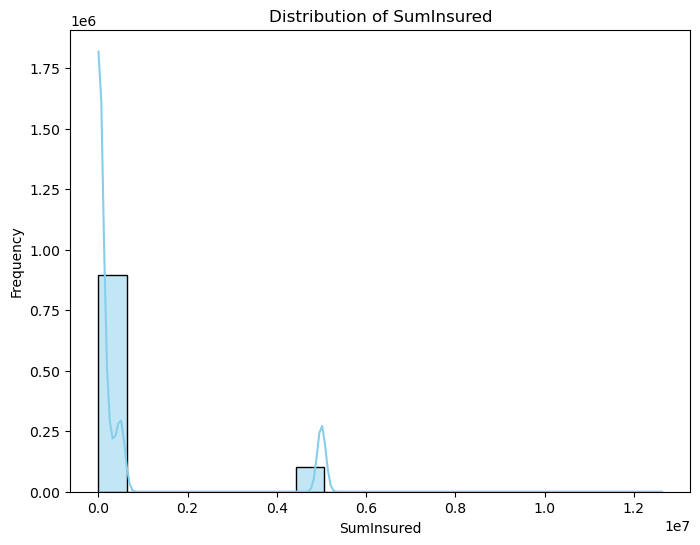

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


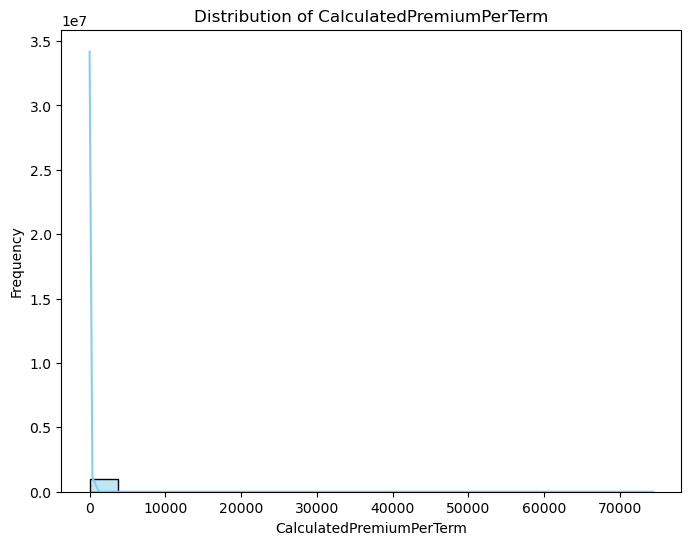

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


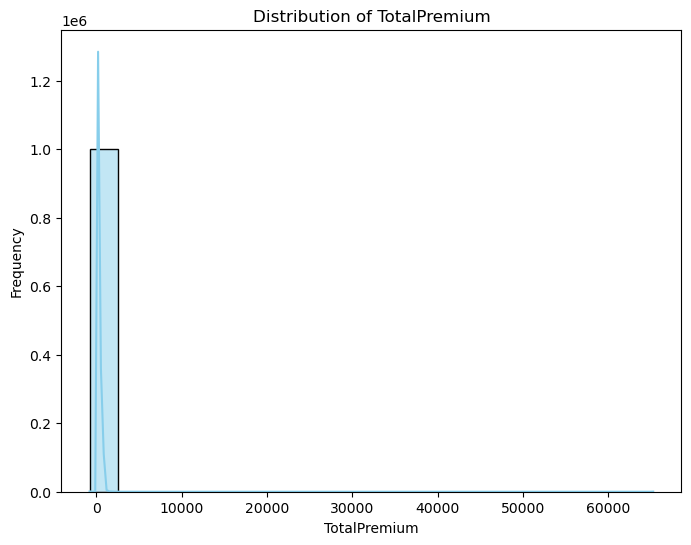

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


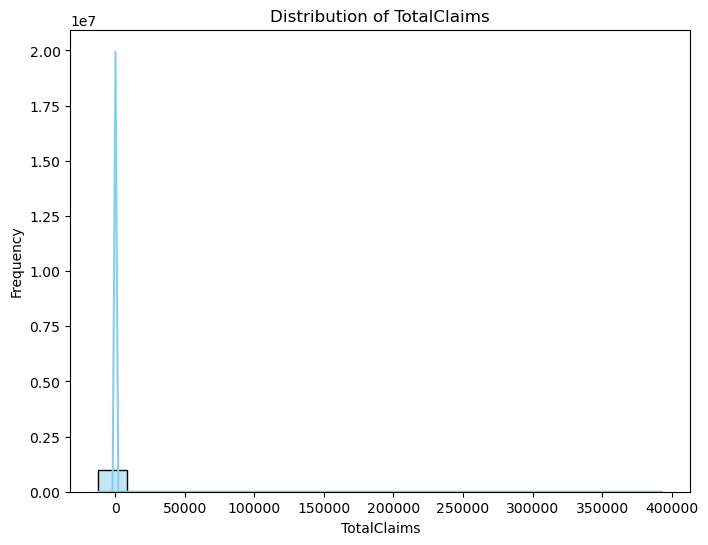

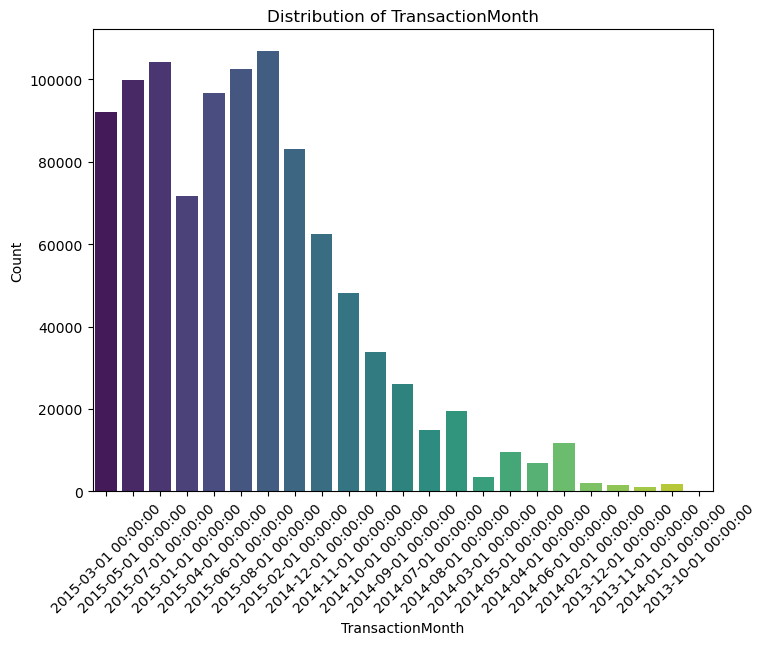

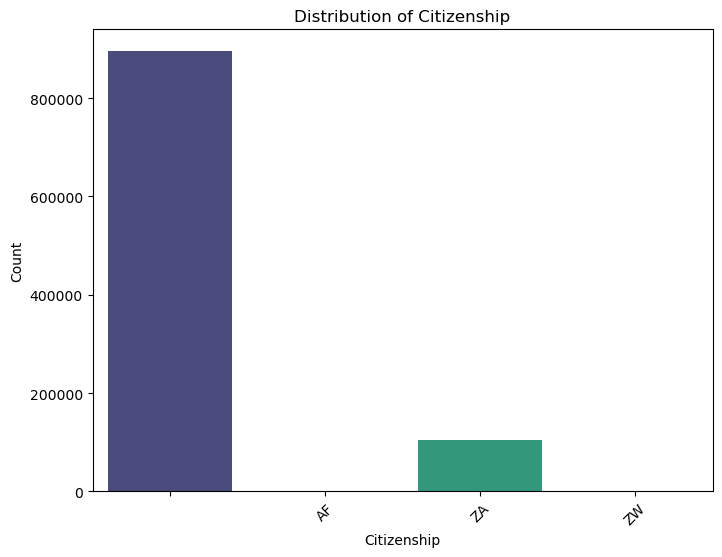

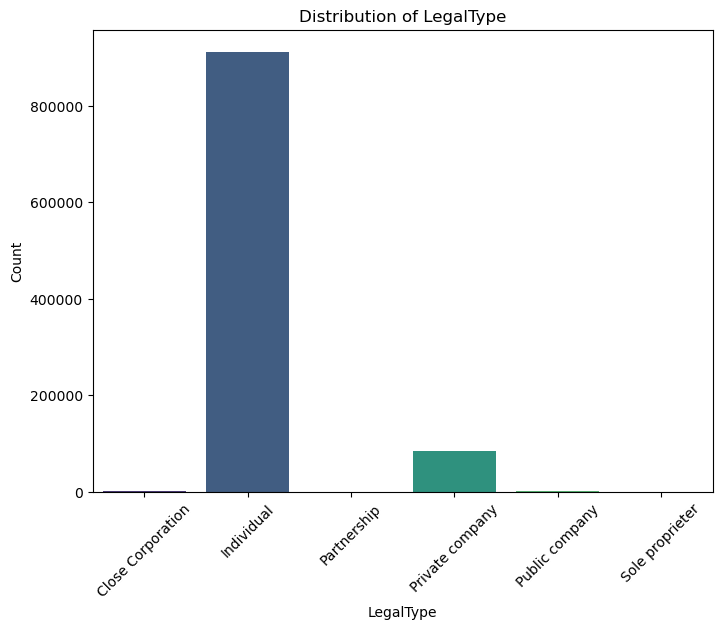

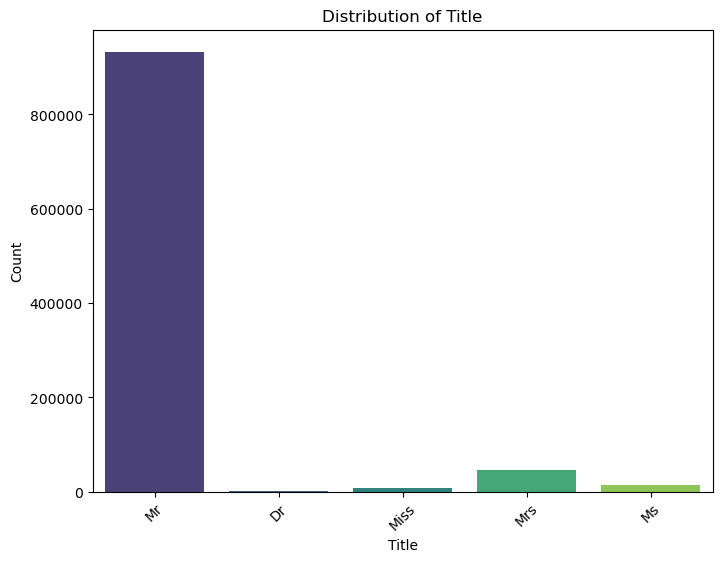

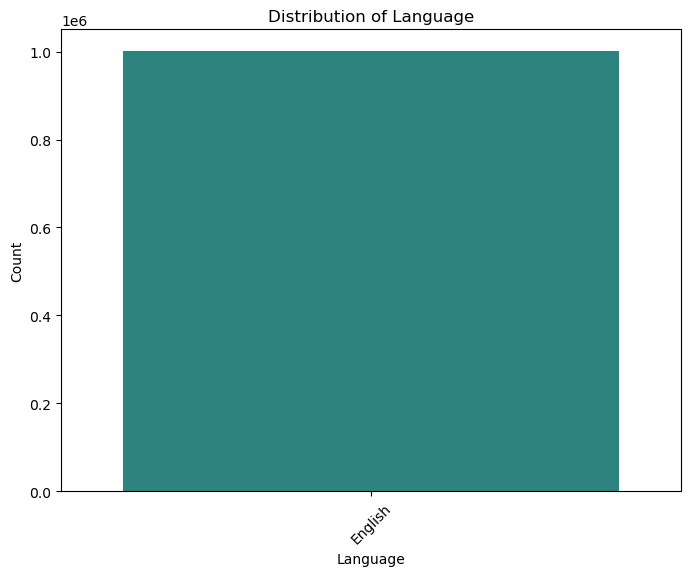

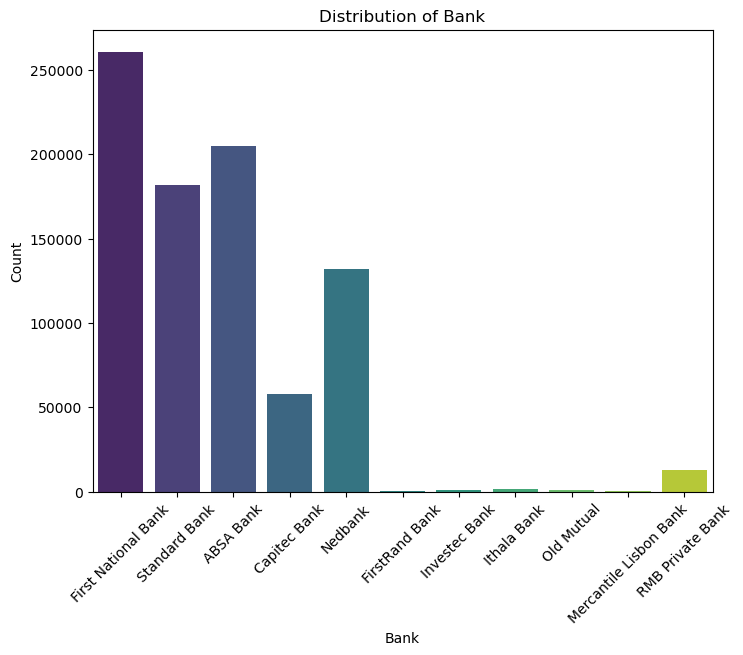

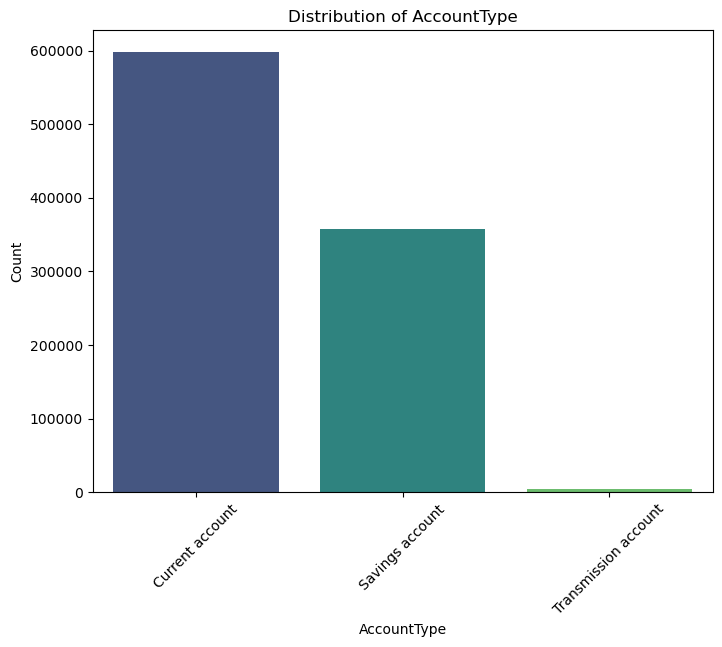

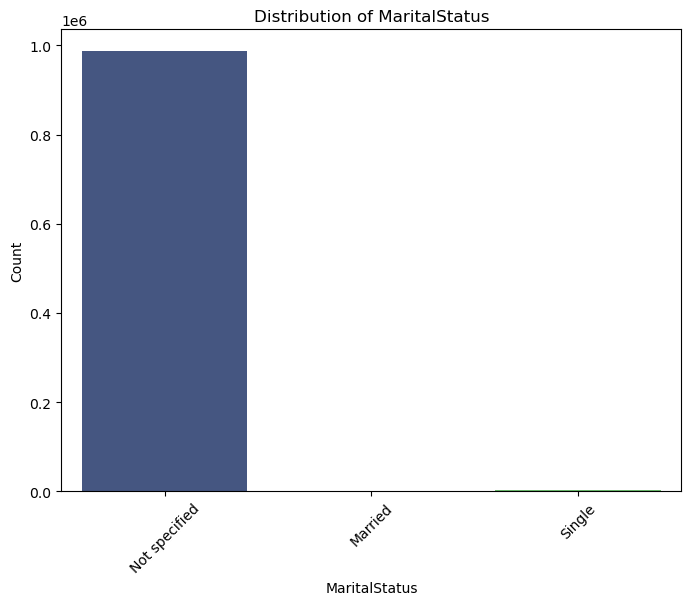

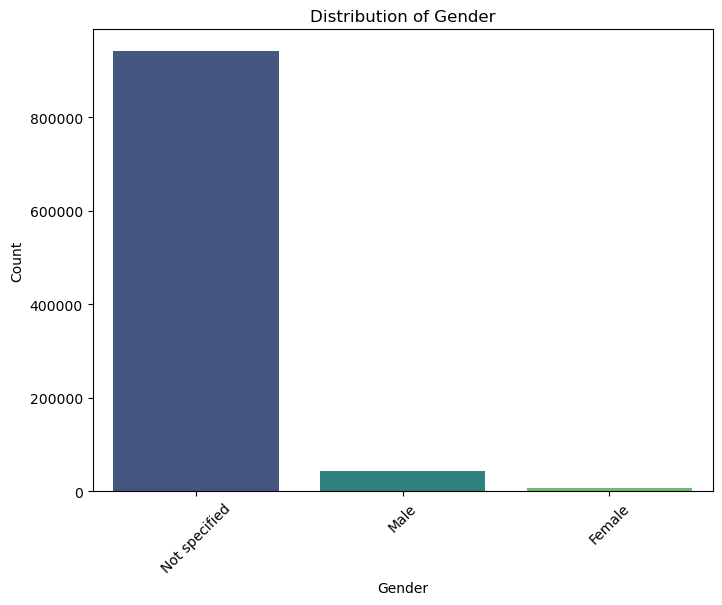

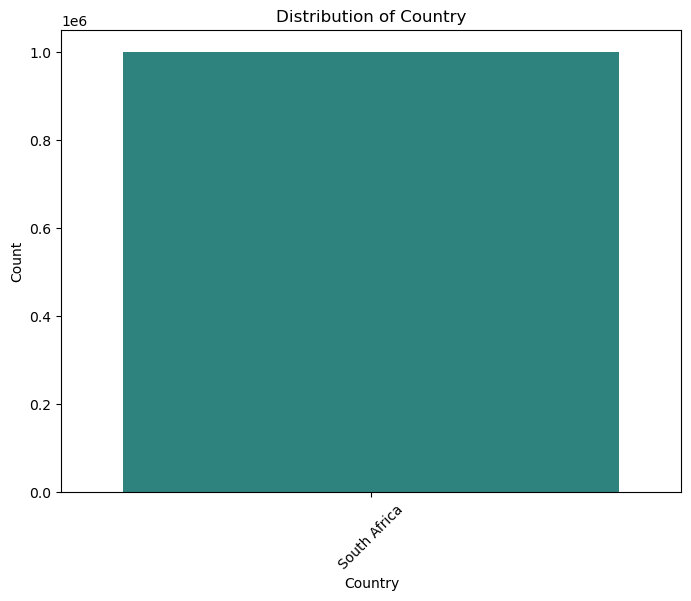

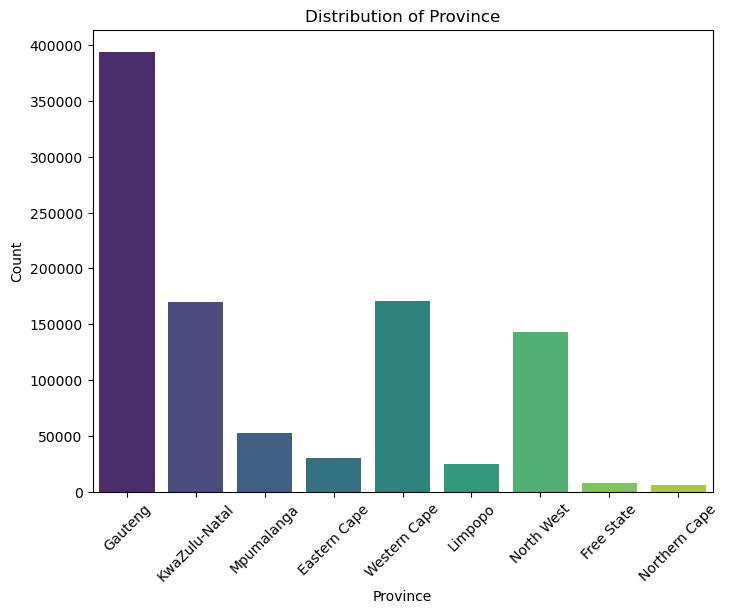

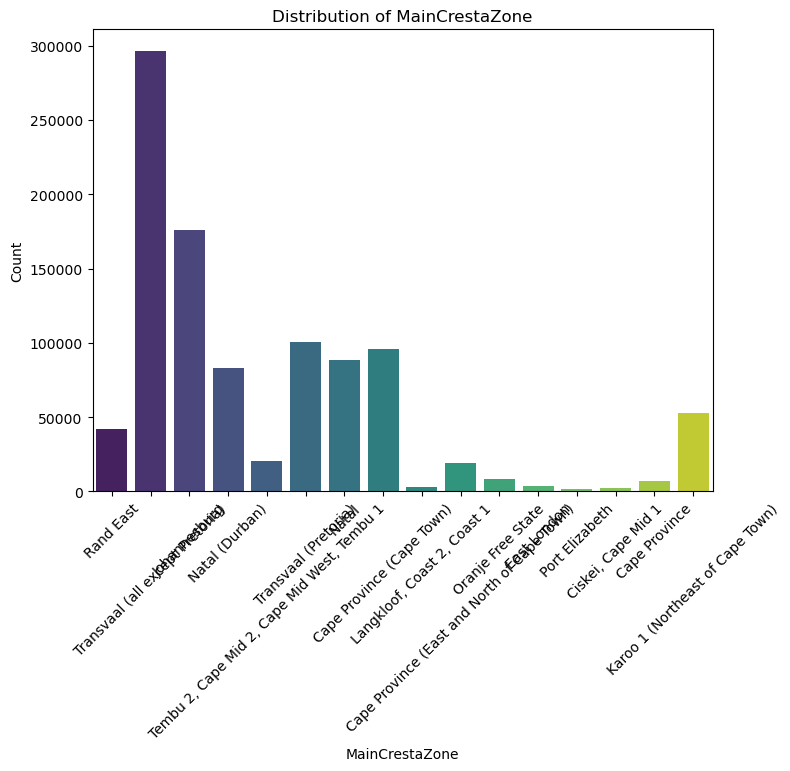

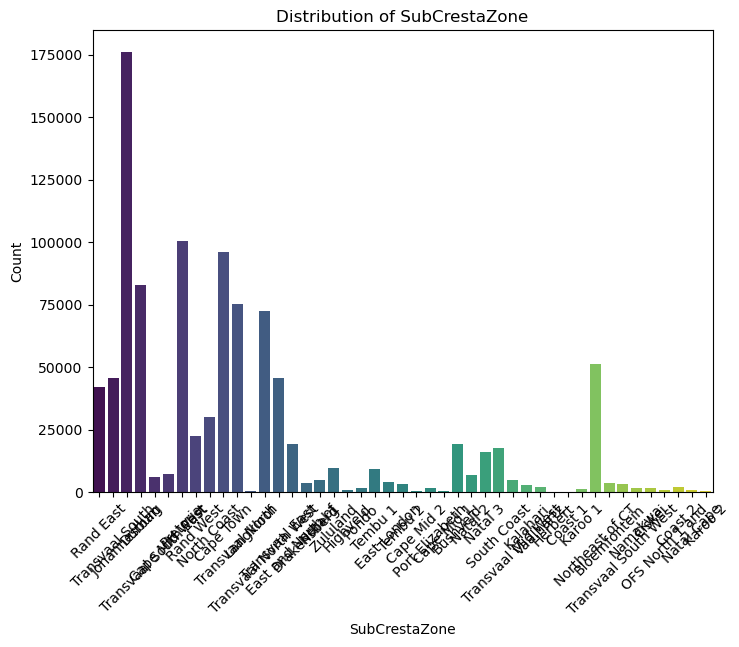

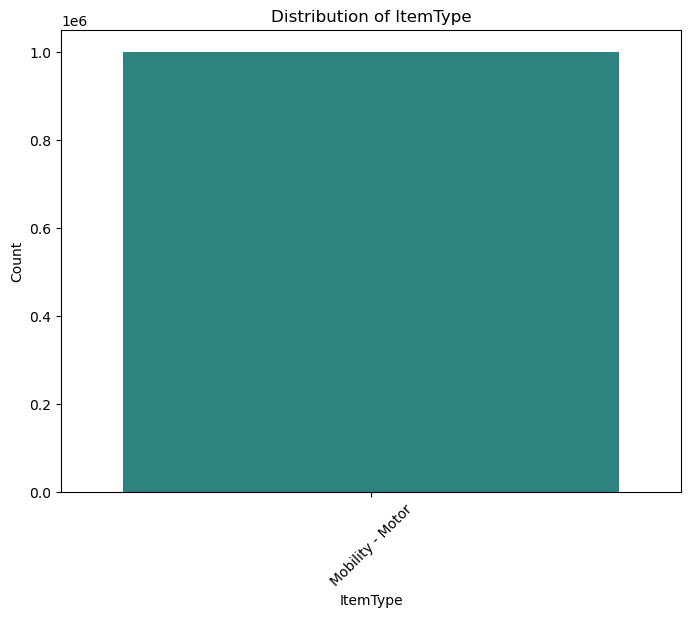

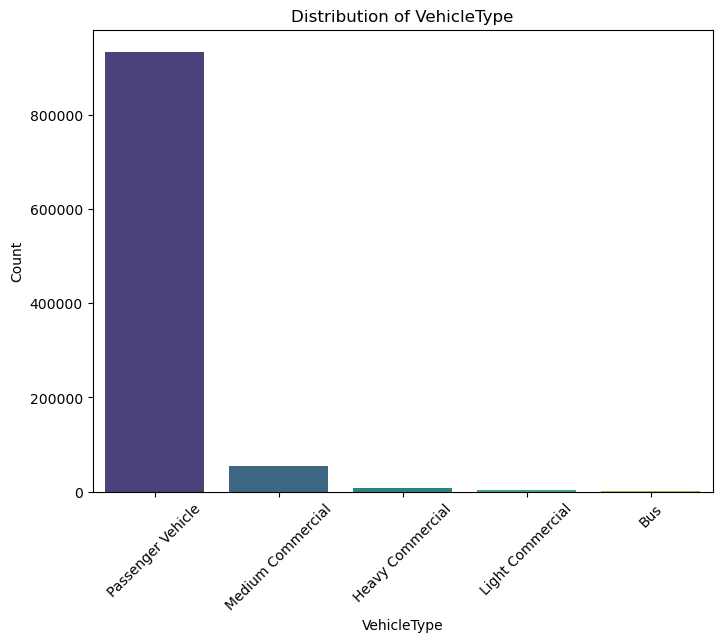

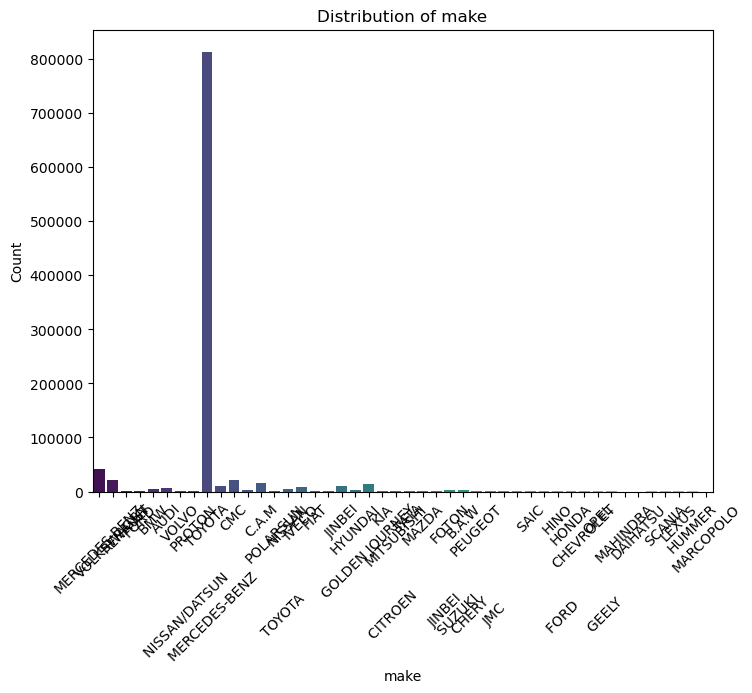

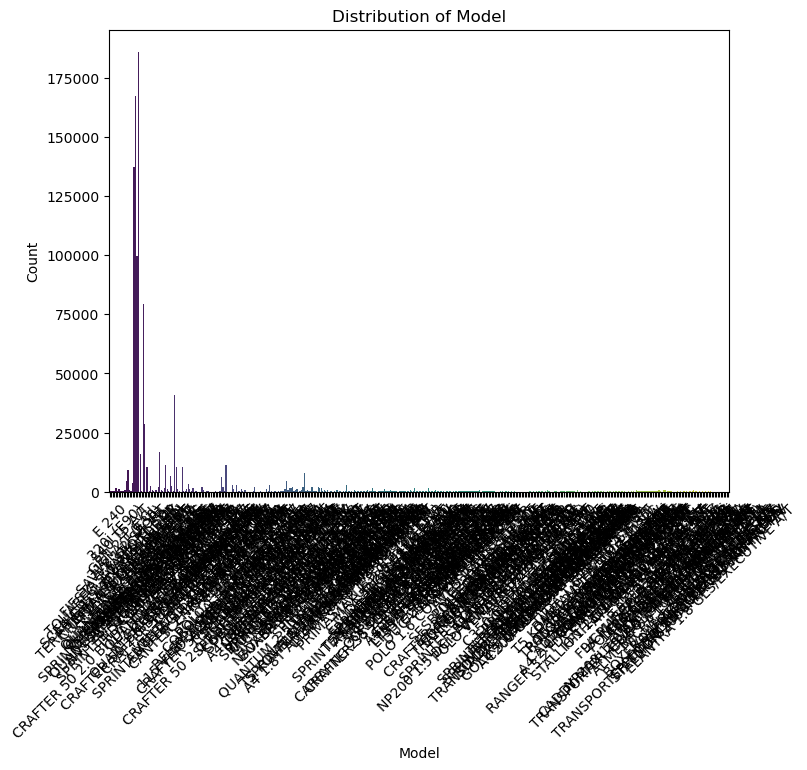

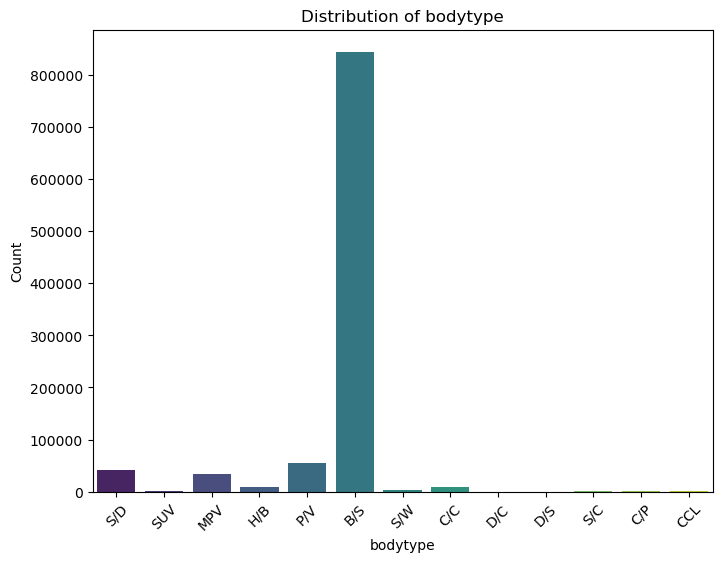

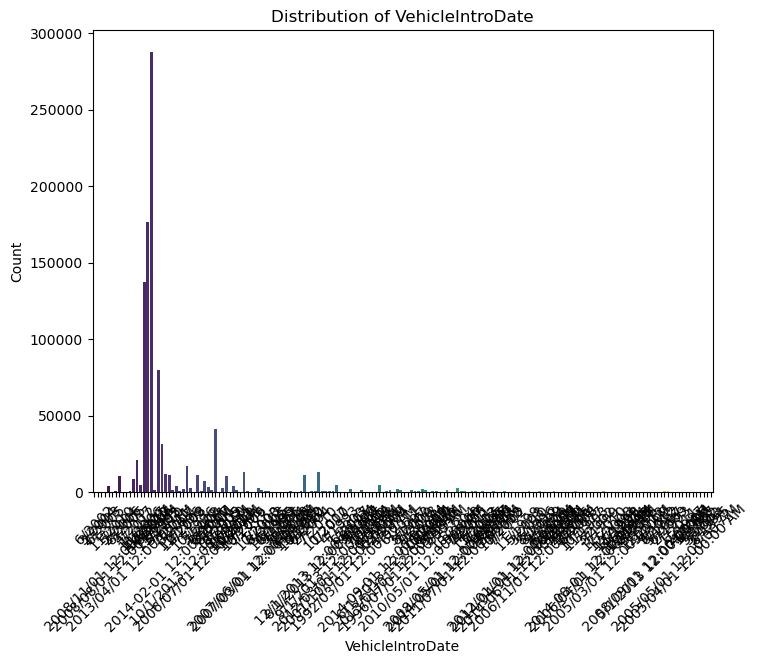

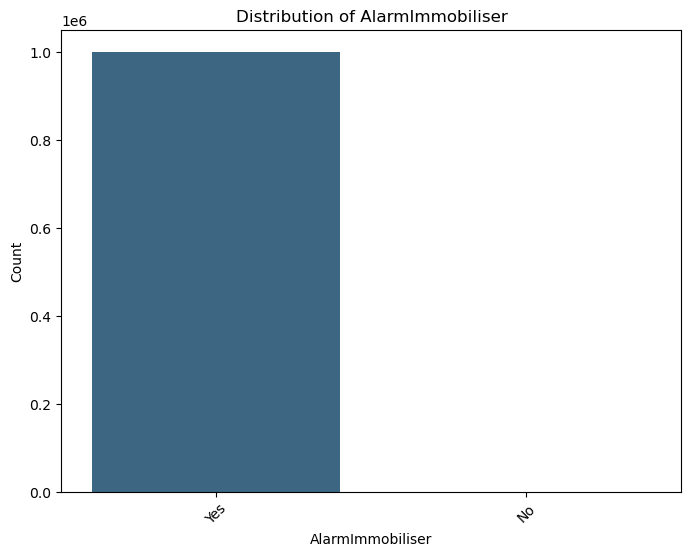

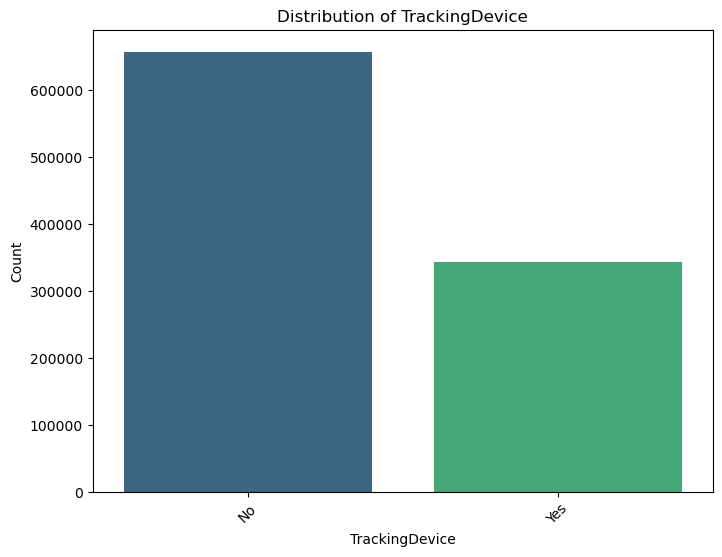

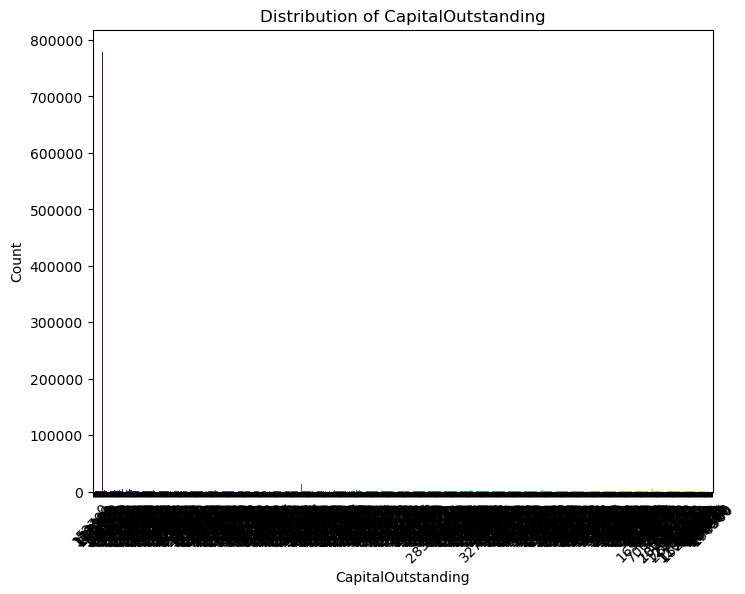

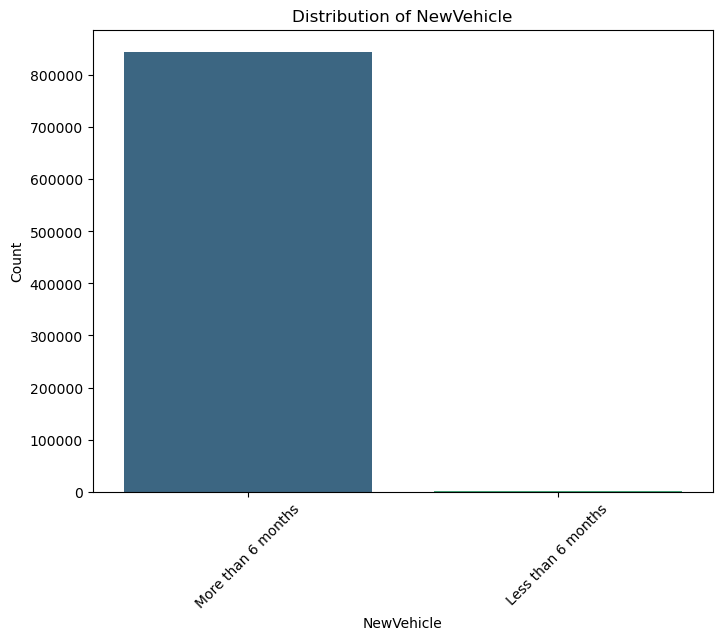

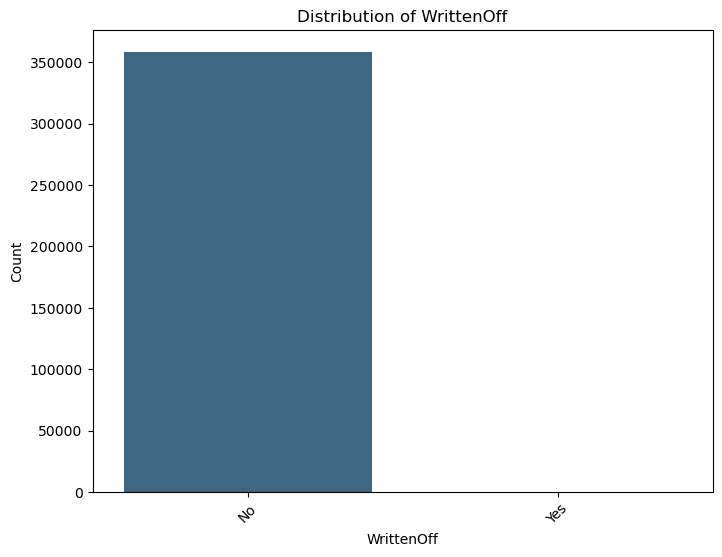

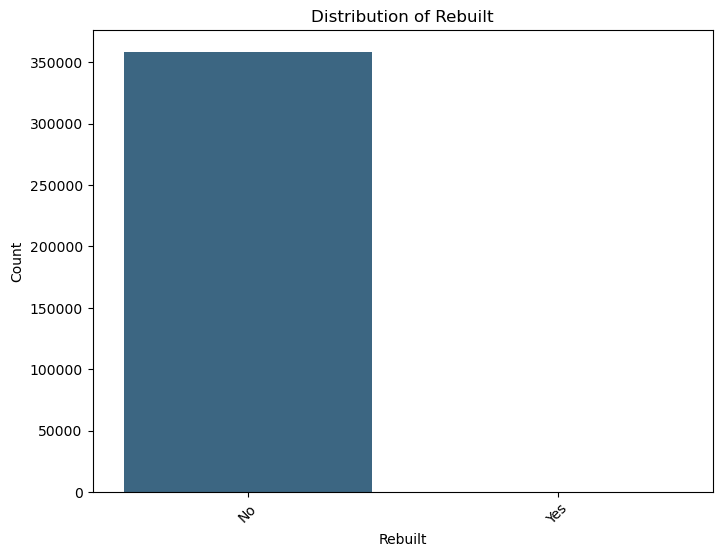

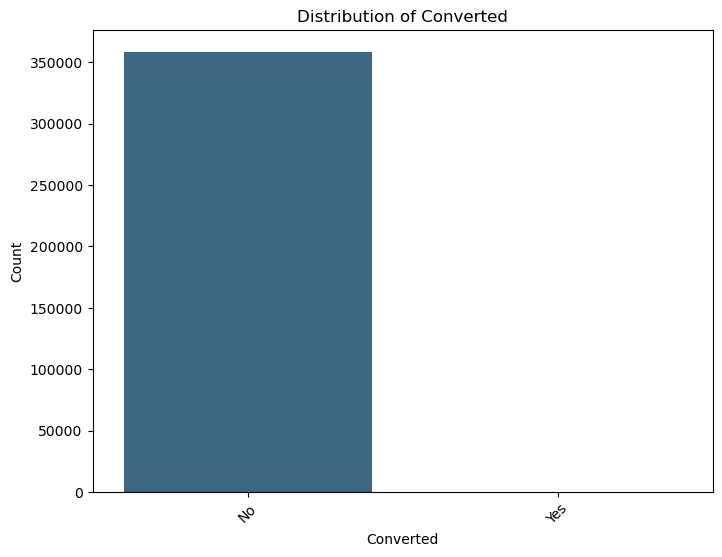

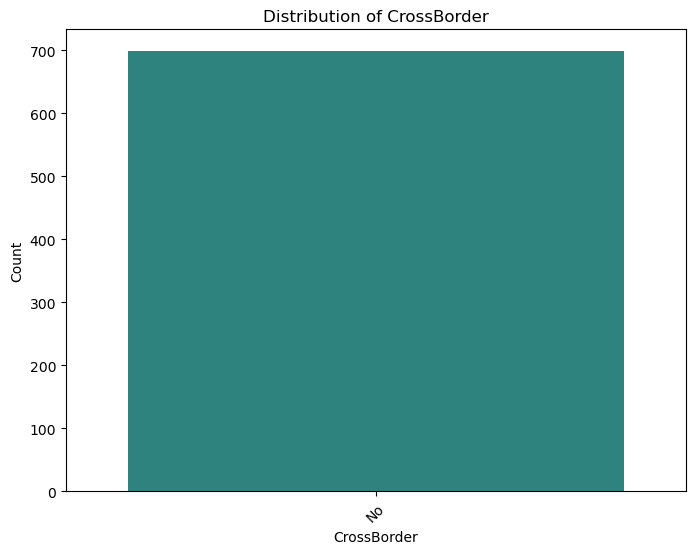

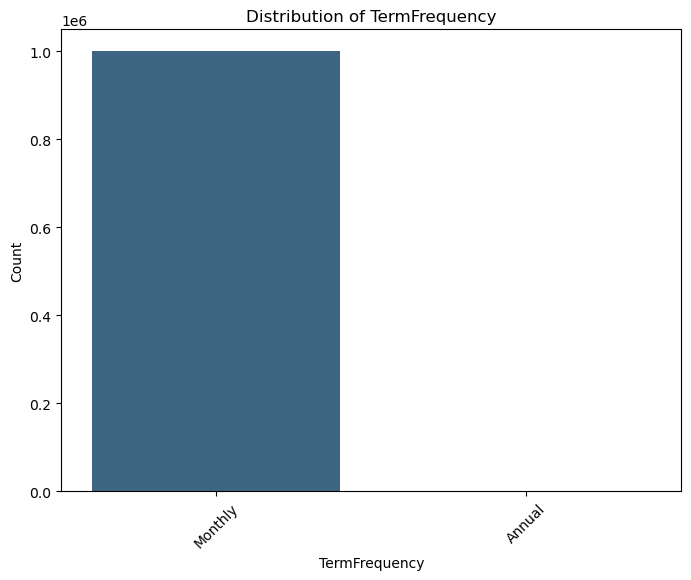

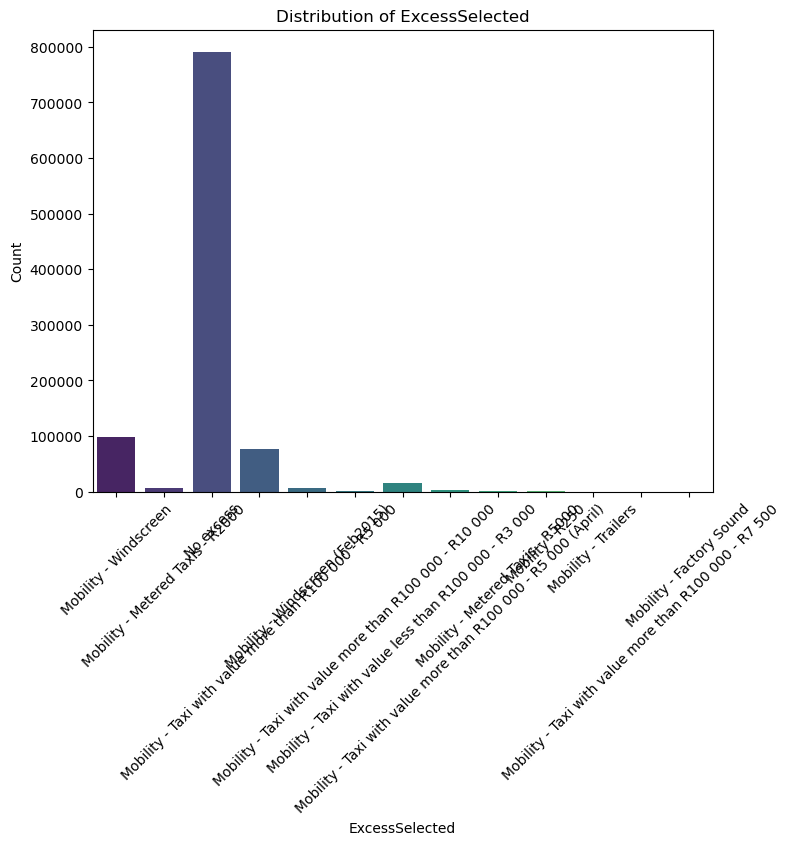

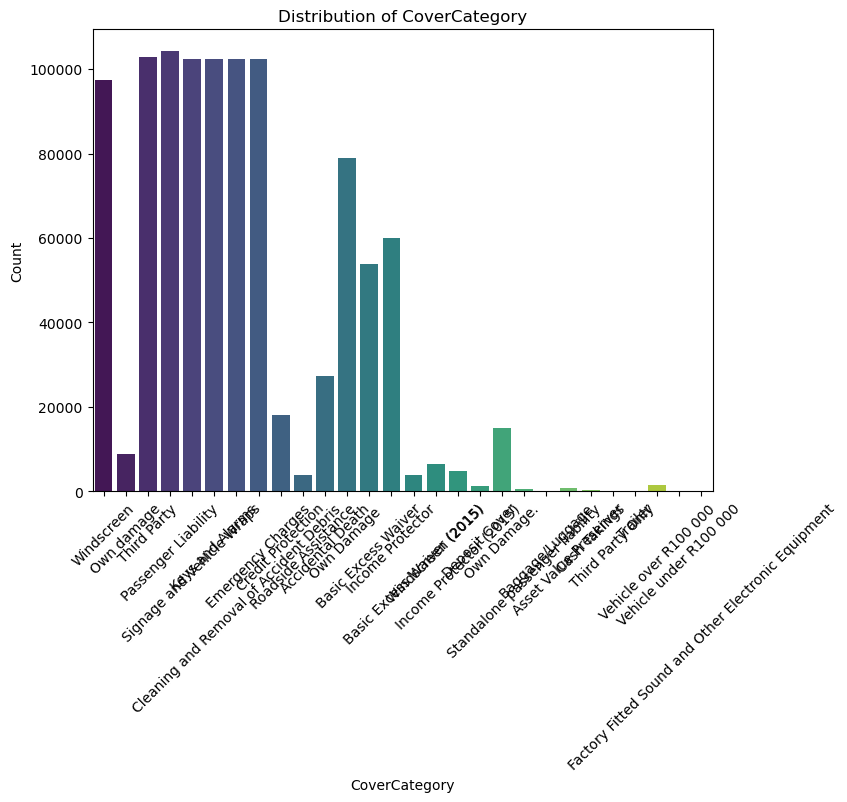

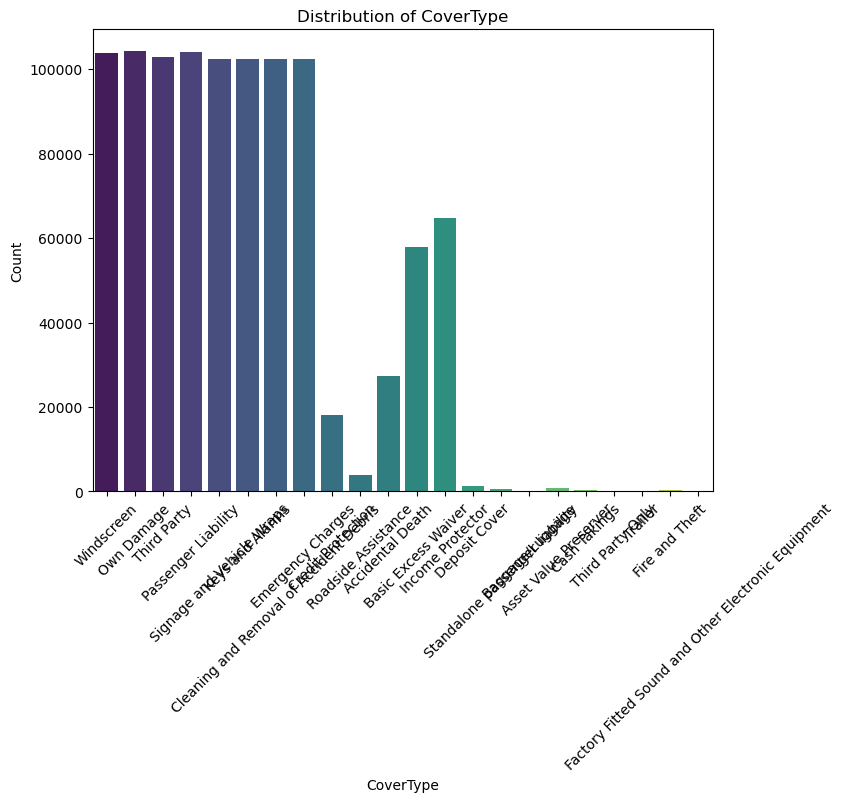

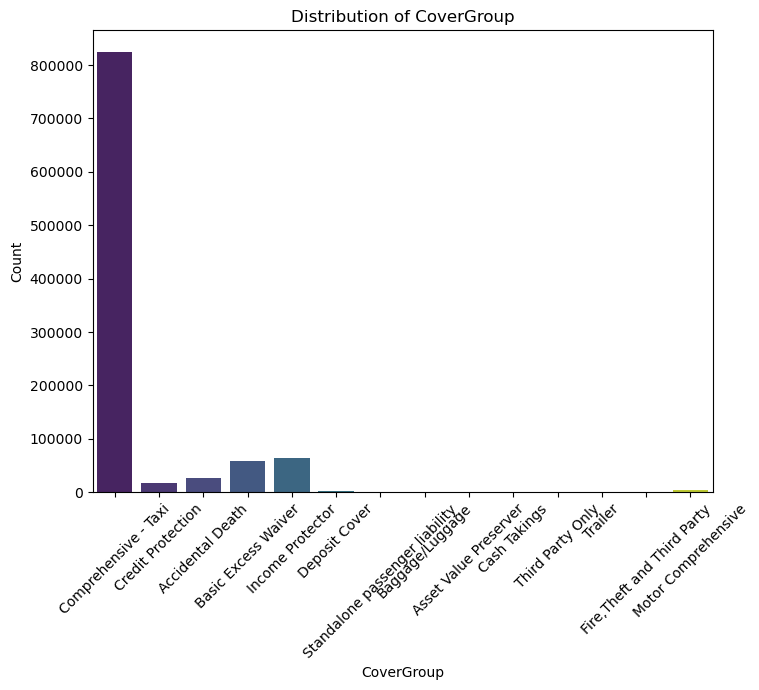

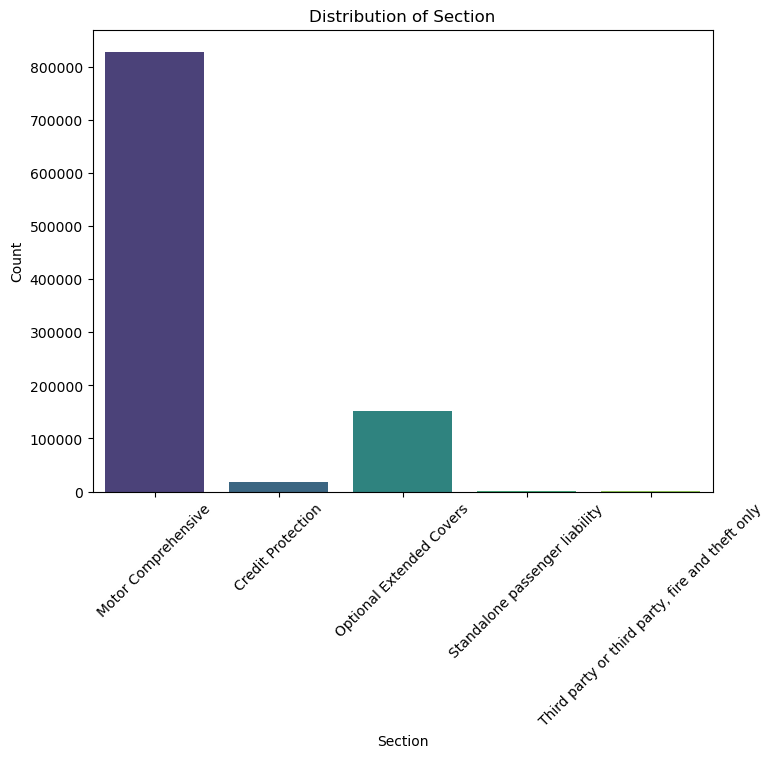

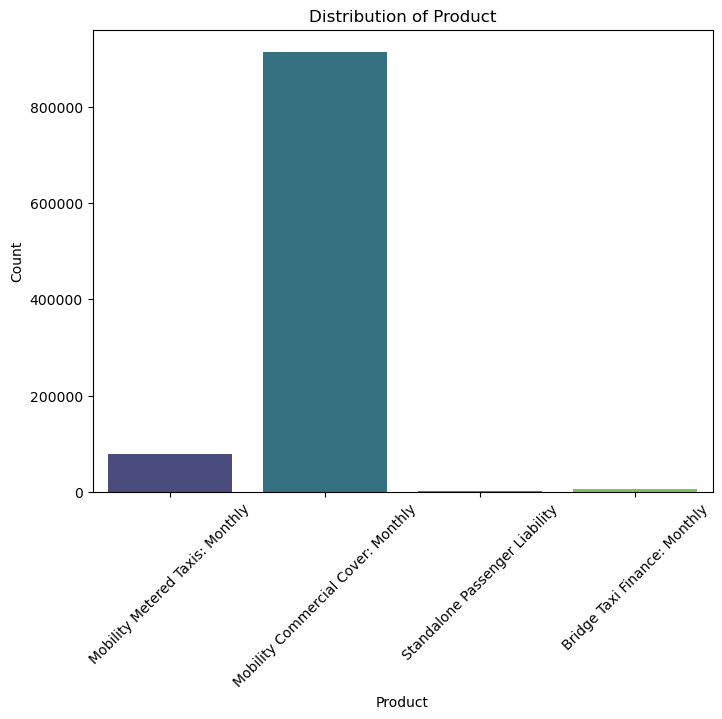

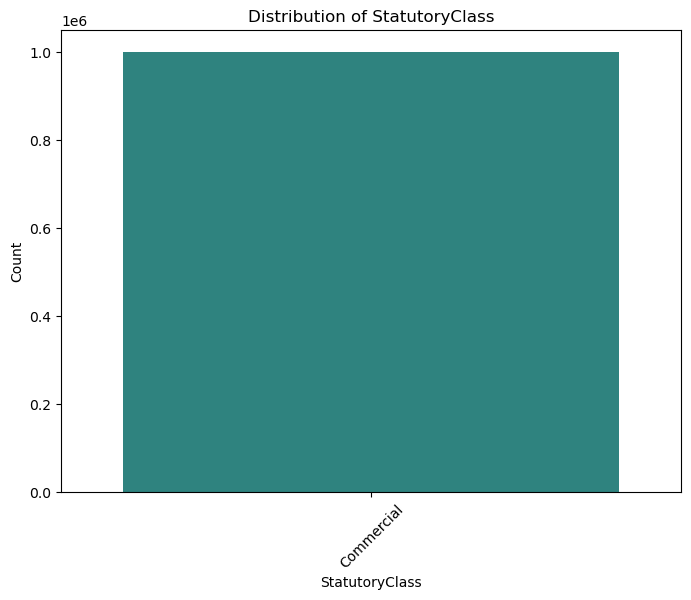

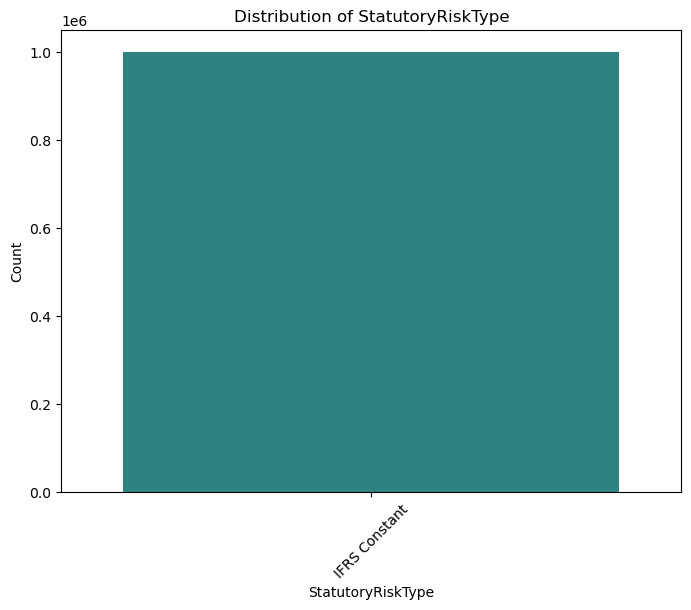

In [7]:
# Univariate Analysis: Distribution of Variables
# Numerical columns: Histograms
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Categorical columns: Bar charts
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

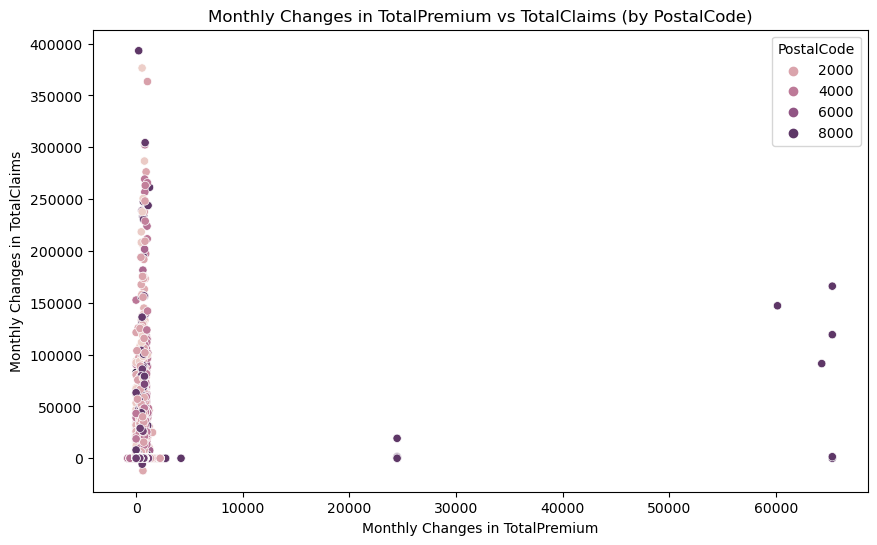

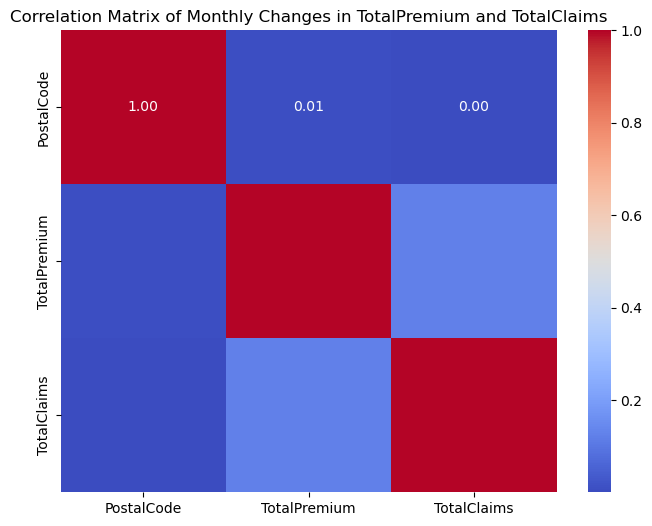

In [12]:
# Extract relevant columns
relevant_cols = ['PostalCode', 'TotalPremium', 'TotalClaims']

# Group by ZipCode and calculate mean monthly changes
monthly_changes = data.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Bivariate Analysis: Correlations and Scatter Plots
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title('Monthly Changes in TotalPremium vs TotalClaims (by PostalCode)')
plt.xlabel('Monthly Changes in TotalPremium')
plt.ylabel('Monthly Changes in TotalClaims')
plt.legend(title='PostalCode')
plt.show()

# Correlation matrix
correlation_matrix = data[relevant_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Monthly Changes in TotalPremium and TotalClaims')
plt.show()

In [17]:
# Group data by PostalCode and calculate summary statistics
zip_stats = data.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].agg(['mean', 'std', 'count', 'min', 'max'])

# Calculate correlation between TotalPremium and TotalClaims
correlation = data.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].corr().iloc[0::2,-1].reset_index(drop=True)

# Merge correlation with zip_stats
zip_stats['Correlation'] = correlation

# Display the summary statistics table
print(zip_stats)

           TotalPremium                                          TotalClaims  \
                   mean         std count       min          max        mean   
PostalCode                                                                     
1             51.120638  137.643380  5341  0.000000  1004.338596   57.589092   
2             40.901700  140.405916  1488  0.000000   967.213684   41.589582   
4            113.947737  238.291883    77  0.264502   877.940000    0.000000   
5             61.653626  112.608031   400  0.000000   420.249737  207.378816   
6             50.591432  136.134398   440  0.000000   637.966140   19.610447   
...                 ...         ...   ...       ...          ...         ...   
9781          54.553324  119.624274   643  0.000000   622.733772  139.499604   
9830         131.760895  244.011809    56  1.496303   744.988246    0.000000   
9868         116.042377  179.134690   100  1.796228   578.659211    0.000000   
9869          44.774438  117.889844  141

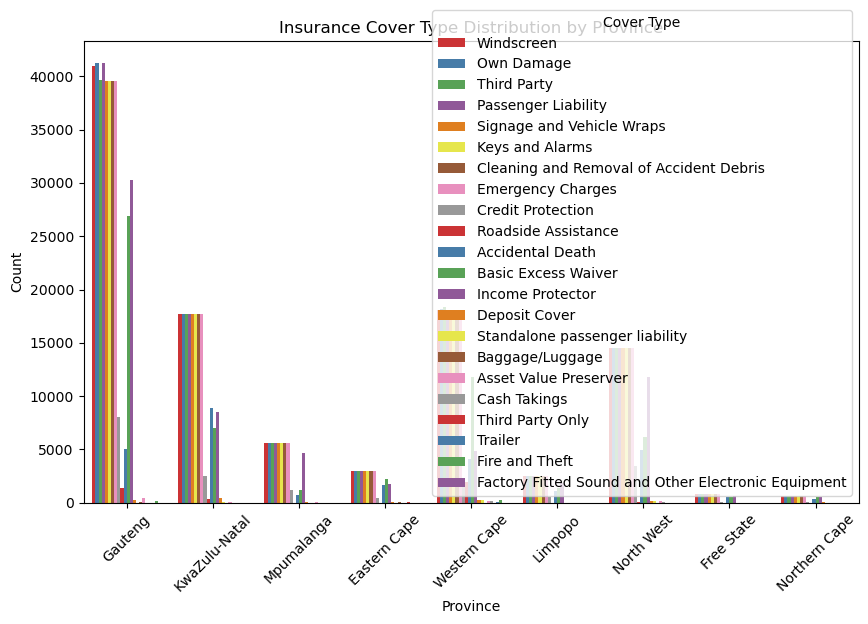

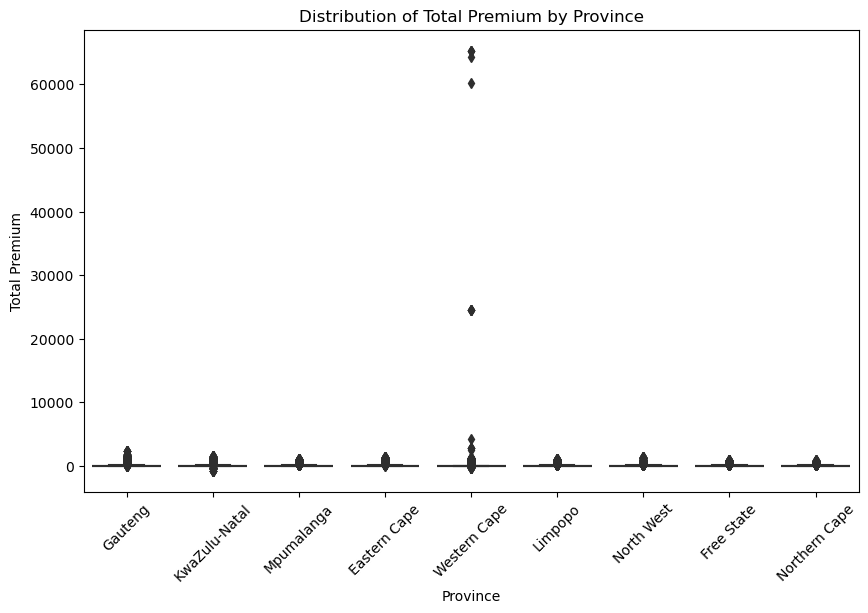

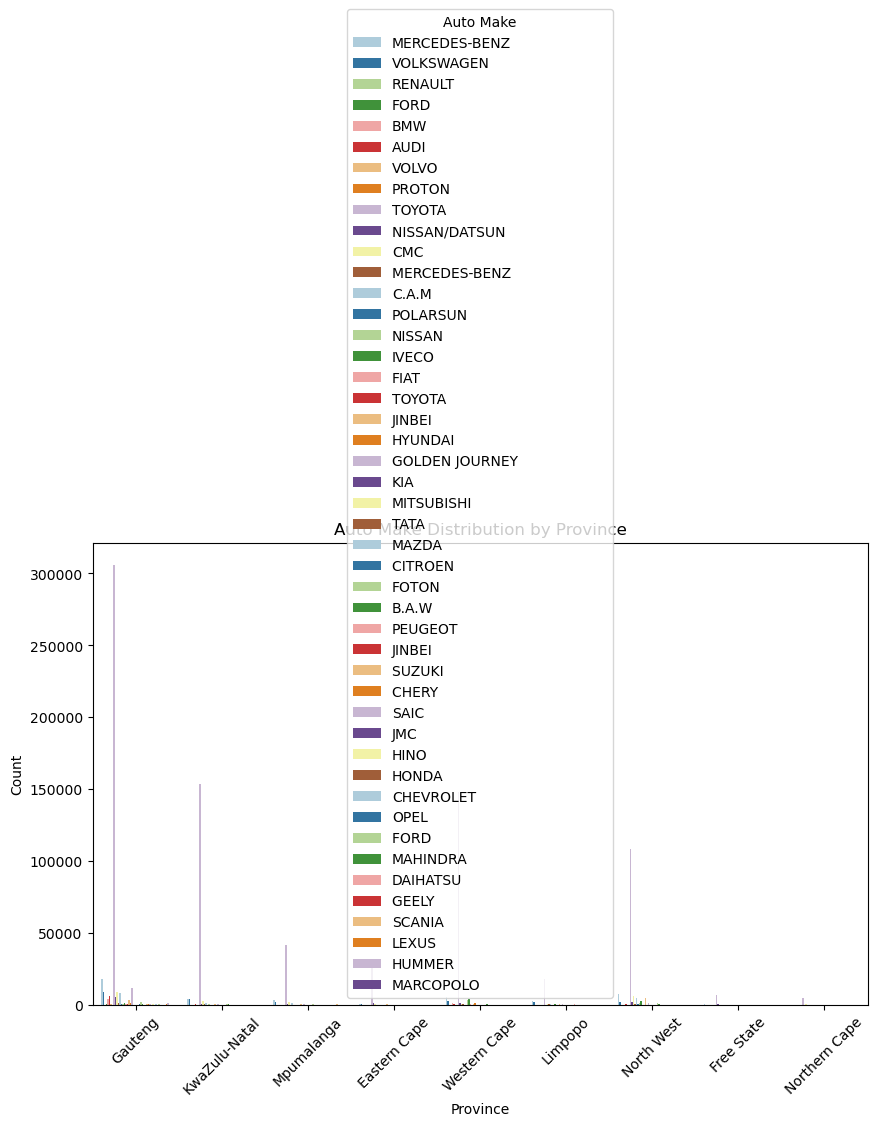

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


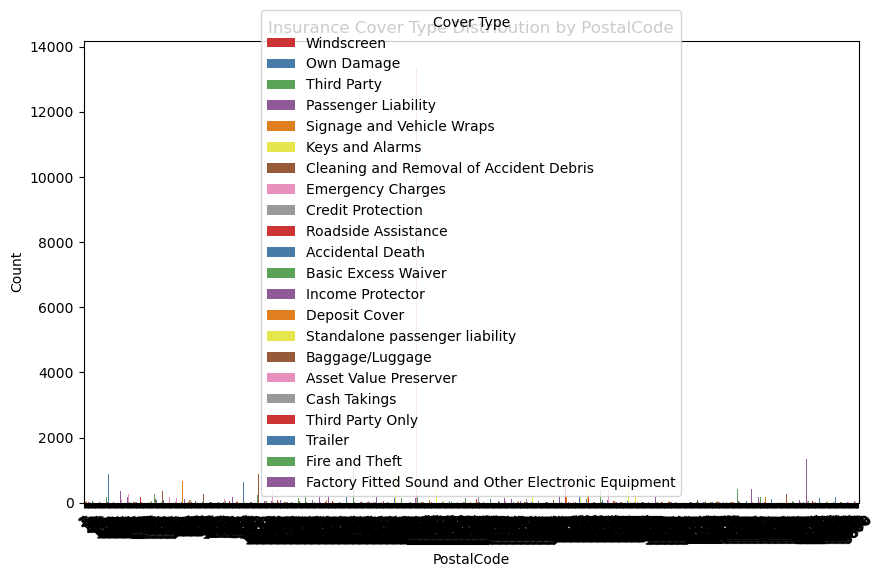

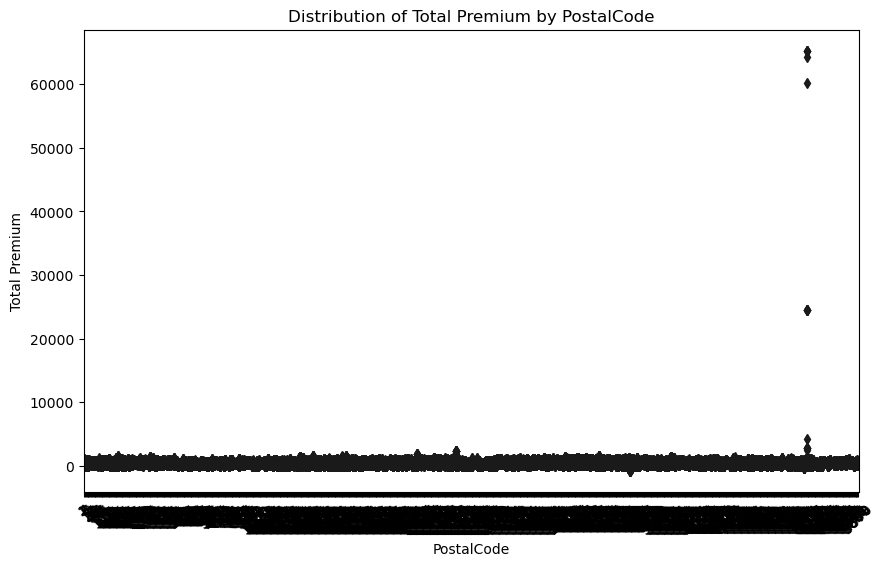

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


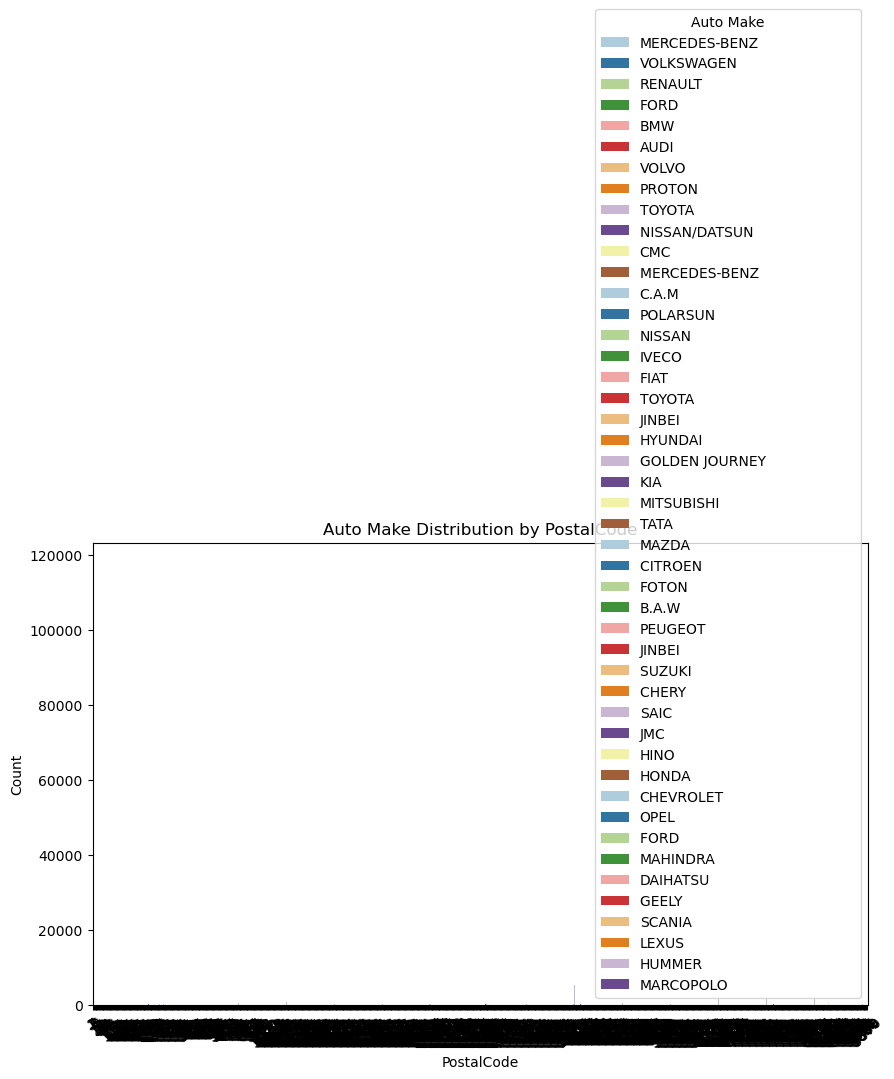

In [14]:
# Identify relevant columns
geography_cols = ['Province', 'PostalCode']
insurance_vars = ['CoverType', 'TotalPremium', 'make']  # Add more variables as needed

# Define custom color palettes
cover_type_palette = 'Set1'
make_palette = 'Paired'

# Group data by geography and analyze trends
for col in geography_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='CoverType', data=data, palette=cover_type_palette)
    plt.title(f'Insurance Cover Type Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Cover Type')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='TotalPremium', data=data, palette='viridis')
    plt.title(f'Distribution of Total Premium by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Premium')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='make', data=data, palette=make_palette)
    plt.title(f'Auto Make Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Auto Make')
    plt.show()

In [18]:
# Function to create summary tables
def create_summary_table(column):
    summary_table = data.groupby(column)[insurance_vars].agg({'CoverType': pd.Series.mode, 'TotalPremium': 'mean', 'make': pd.Series.mode}).reset_index()
    return summary_table

# Create summary tables for each geography column
for col in geography_cols:
    summary_table = create_summary_table(col)
    print(f"Summary Table for {col}:")
    print(summary_table)
    print()

Summary Table for Province:
        Province                                          CoverType  \
0   Eastern Cape  [Cleaning and Removal of Accident Debris, Emer...   
1     Free State  [Cleaning and Removal of Accident Debris, Emer...   
2        Gauteng                                         Own Damage   
3  KwaZulu-Natal                                        Third Party   
4        Limpopo  [Cleaning and Removal of Accident Debris, Emer...   
5     Mpumalanga                          [Third Party, Windscreen]   
6     North West                                        Third Party   
7  Northern Cape  [Cleaning and Removal of Accident Debris, Emer...   
8   Western Cape                                        Third Party   

   TotalPremium    make  
0     70.546672  TOYOTA  
1     64.373780  TOYOTA  
2     61.071115  TOYOTA  
3     77.800695  TOYOTA  
4     61.899038  TOYOTA  
5     53.801205  TOYOTA  
6     52.276258  TOYOTA  
7     49.617253  TOYOTA  
8     57.416793  TOYOTA  



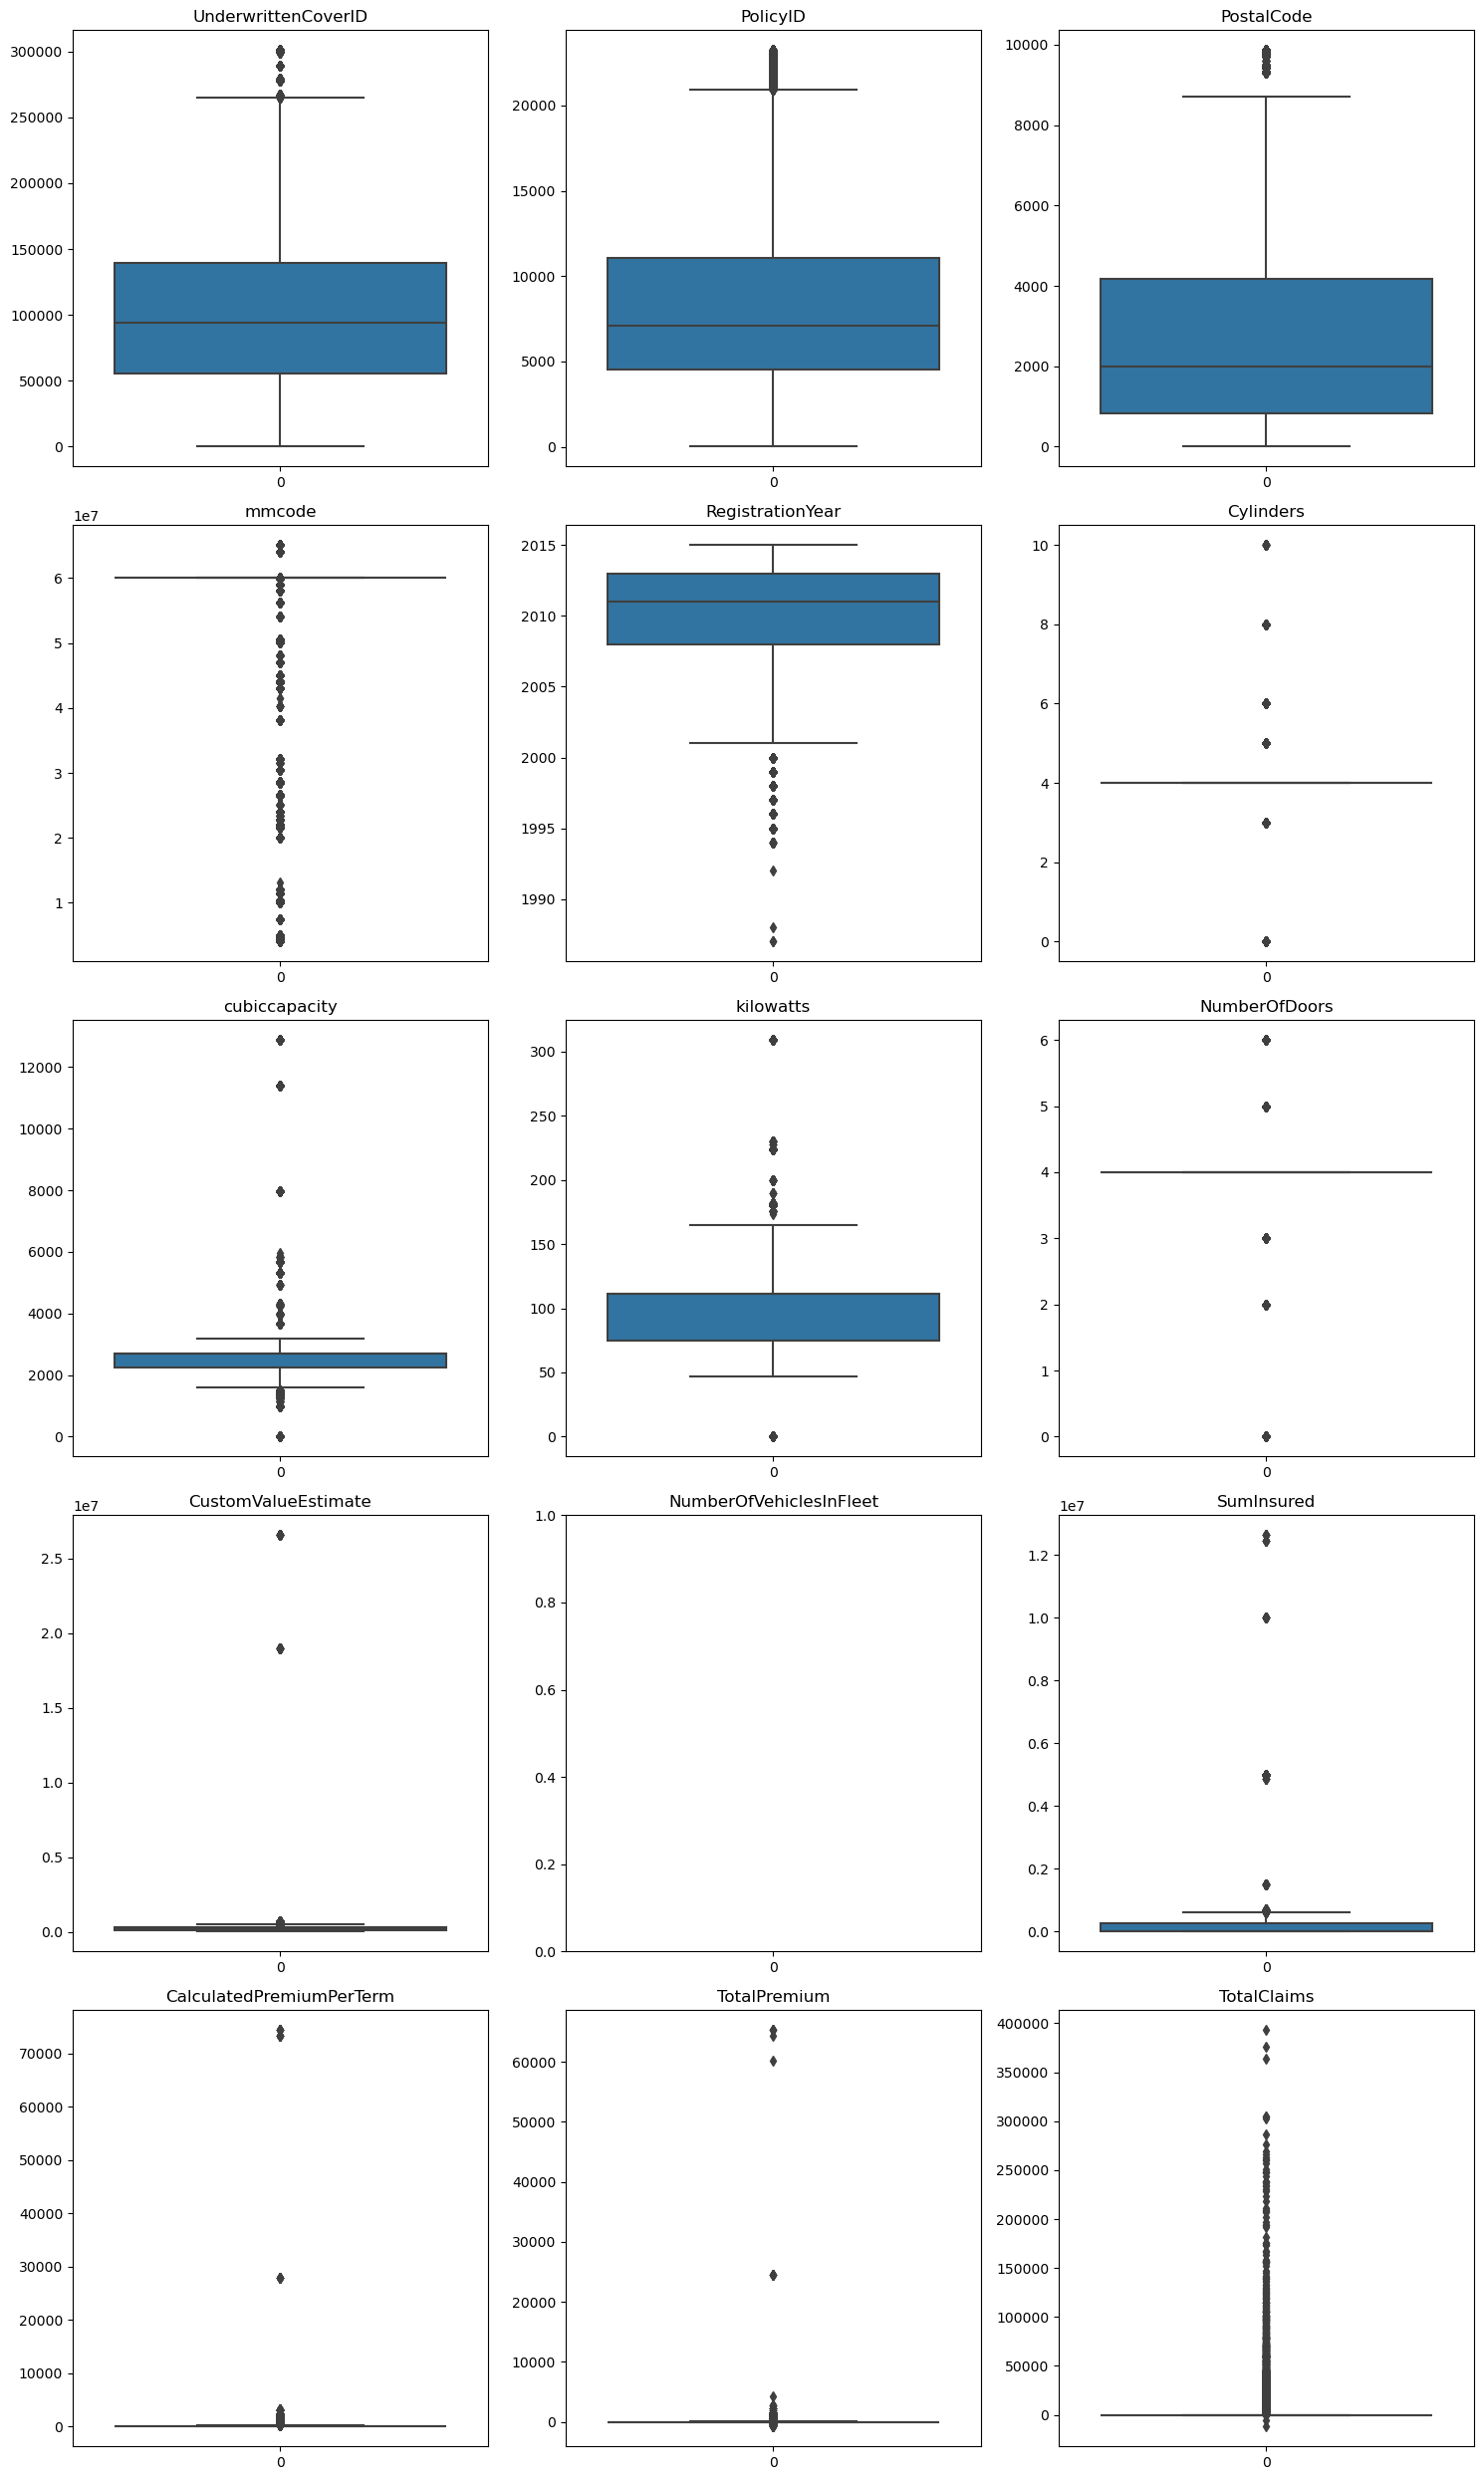

In [21]:
# Identify columns with numerical data
numerical_cols = data.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  # Adjusted for uneven division

# Create box plots for each numerical column
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(data[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

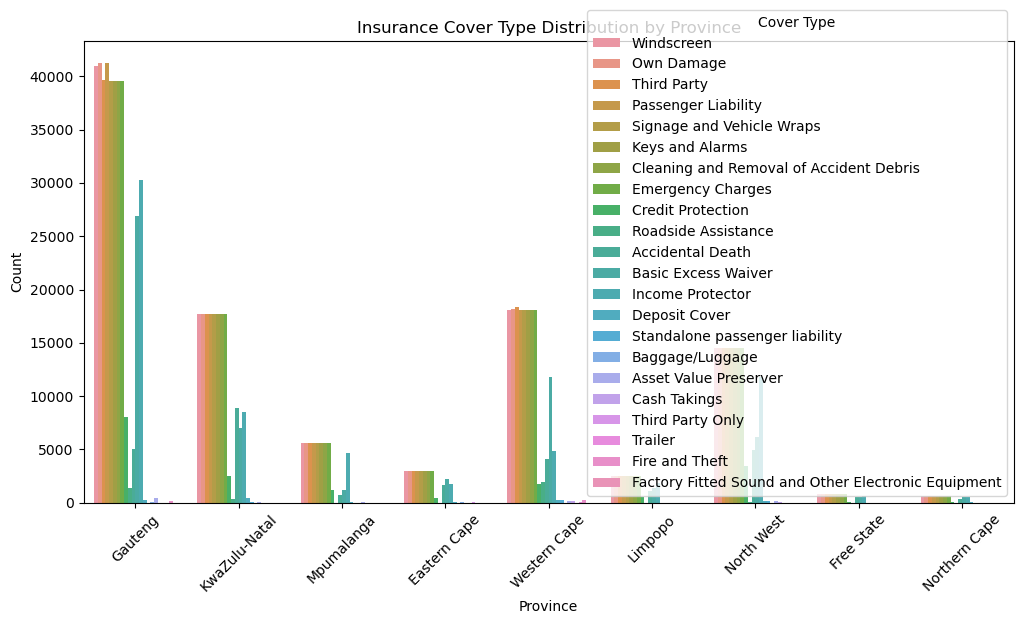

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

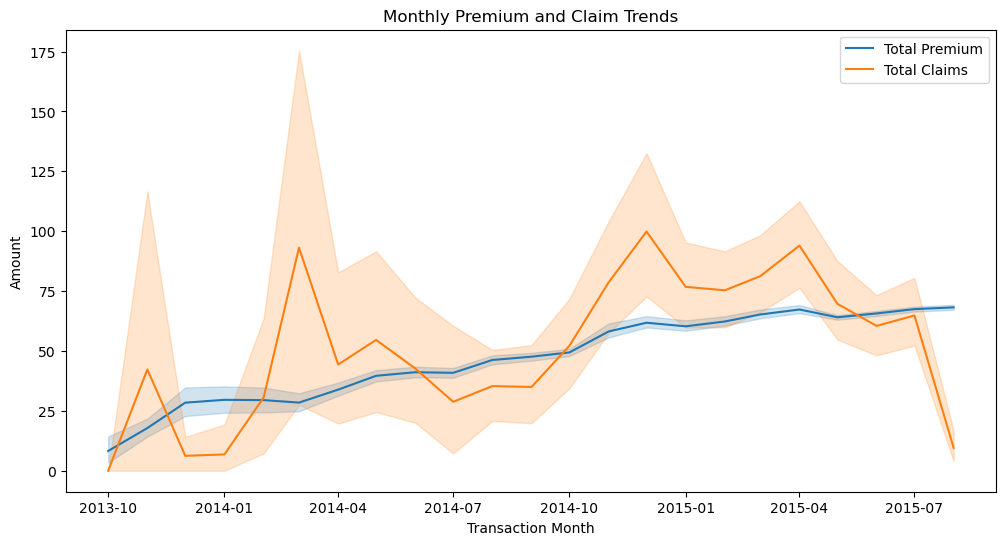

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


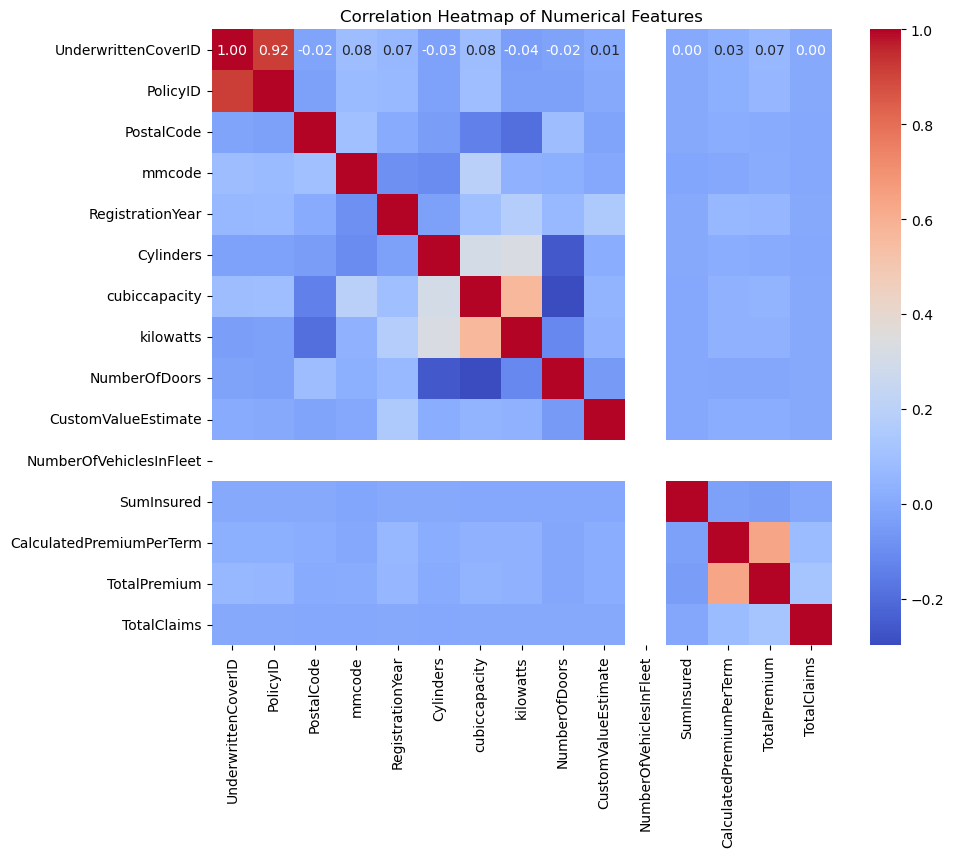

In [24]:
# three creative and insightful plots

# 1. Insurance Cover Type Distribution by Province
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Province', hue='CoverType')
plt.title('Insurance Cover Type Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cover Type')
plt.show()

# 2. Monthly Premium and Claim Trends
# Convert TransactionMonth to datetime
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='TransactionMonth', y='TotalPremium', label='Total Premium')
sns.lineplot(data=data, x='TransactionMonth', y='TotalClaims', label='Total Claims')
plt.title('Monthly Premium and Claim Trends')
plt.xlabel('Transaction Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

# 3. Correlation Heatmap of Numerical Features
# Select numerical columns
numerical_features = data.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [3]:
# task 3

# Select Metrics
# Risk Differences Across Provinces
province_metrics = data.groupby('Province')['TotalClaims'].mean()

# Risk Differences Between Zip Codes
zipcode_metrics = data.groupby('PostalCode')['TotalClaims'].count()

# Significant Margin Differences Between Zip Codes
zipcode_profit_metrics = data.groupby('PostalCode')['TotalPremium'].sum()

# Risk Differences Between Genders
gender_metrics = data.groupby('Gender')['TotalClaims'].mean()

# Display the metrics
print("Risk Differences Across Provinces (Average Claim Amount):\n", province_metrics)
print("\nRisk Differences Between Zip Codes (Claim Frequency):\n", zipcode_metrics)
print("\nSignificant Margin Differences Between Zip Codes (Profit Margin per Policy):\n", zipcode_profit_metrics)
print("\nRisk Differences Between Genders (Average Claim Amount):\n", gender_metrics)

Risk Differences Across Provinces (Average Claim Amount):
 Province
Eastern Cape     44.713432
Free State       43.822975
Gauteng          74.630009
KwaZulu-Natal    84.234293
Limpopo          40.927553
Mpumalanga       38.785147
North West       41.317426
Northern Cape    14.026726
Western Cape     60.831482
Name: TotalClaims, dtype: float64

Risk Differences Between Zip Codes (Claim Frequency):
 PostalCode
1       5341
2       1488
4         77
5        400
6        440
        ... 
9781     643
9830      56
9868     100
9869    1415
9870     220
Name: TotalClaims, Length: 888, dtype: int64

Significant Margin Differences Between Zip Codes (Profit Margin per Policy):
 PostalCode
1       273035.326595
2        60861.729133
4         8773.975714
5        24661.450526
6        22260.230088
            ...      
9781     35077.787598
9830      7378.610100
9868     11604.237719
9869     63355.830081
9870     17703.244175
Name: TotalPremium, Length: 888, dtype: float64

Risk Differences Be

In [10]:
# Calculate Estimated Profit Margin per Policy
data['EstimatedProfitMargin'] = (data['TotalPremium'] - data['TotalClaims']) / data['TotalPremium']

# Data Segmentation

# Risk Differences Across Provinces
# Define two provinces for comparison (e.g., Province A and Province B)
province_A = 'KwaZulu-Natal'
province_B = 'Northern Cape'

# Group A (Control Group): Policies issued in Province A
group_A = data[data['Province'] == province_A]

# Group B (Test Group): Policies issued in Province B
group_B = data[data['Province'] == province_B]

# Risk Differences Between Zip Codes
# Define two sets of zip codes for comparison (e.g., Even and Odd zip codes)
# Here, we'll use the last digit of the postal code to differentiate between groups
group_A_zip = data[data['PostalCode'] % 2 == 0]  # Policies with even postal codes
group_B_zip = data[data['PostalCode'] % 2 != 0]  # Policies with odd postal codes

# Significant Margin Differences Between Zip Codes
# For the sake of this example, let's define profitability based on the estimated profit margin
# Policies with a profit margin above a certain threshold are considered more profitable
profit_margin_threshold = 0.2  # Adjust this threshold as needed
group_A_profitable = data[data['EstimatedProfitMargin'] > profit_margin_threshold]
group_B_profitable = data[data['EstimatedProfitMargin'] <= profit_margin_threshold]

# Risk Differences Between Genders
# Group A (Control Group): Policies held by male policyholders
# Group B (Test Group): Policies held by female policyholders
group_A_gender = data[data['Gender'] == 'Male']
group_B_gender = data[data['Gender'] == 'Female']

# Displaying the sizes of the segmented groups
print("Size of Group A (Province):", len(group_A))
print("Size of Group B (Province):", len(group_B))
print("Size of Group A (Zip Code):", len(group_A_zip))
print("Size of Group B (Zip Code):", len(group_B_zip))
print("Size of Group A (Profitable):", len(group_A_profitable))
print("Size of Group B (Not Profitable):", len(group_B_profitable))
print("Size of Group A (Gender):", len(group_A_gender))
print("Size of Group B (Gender):", len(group_B_gender))

Size of Group A (Province): 169781
Size of Group B (Province): 6380
Size of Group A (Zip Code): 674046
Size of Group B (Zip Code): 326052
Size of Group A (Profitable): 615837
Size of Group B (Not Profitable): 2777
Size of Group A (Gender): 42817
Size of Group B (Gender): 6755


In [17]:
# 1. Risk Differences Across Provinces (t-test)
statistic, p_value_province = ttest_ind(group_A['TotalClaims'], group_B['TotalClaims'])

if p_value_province < 0.05:
    print("Reject Null Hypothesis: There are significant risk differences across provinces.")
else:
    print("Fail to Reject Null Hypothesis: There are no significant risk differences across provinces.")

# 2. Perform Kruskal-Wallis H-test since 'PostalCode' likely has too many unique values for a chi-squared test
h_statistic, p_value_zip = kruskal(*[group['TotalClaims'] for name, group in data.groupby('PostalCode')])

if p_value_zip < 0.05:
    print("Reject Null Hypothesis: There are significant risk differences between zip codes.")
else:
    print("Fail to Reject Null Hypothesis: There are no significant risk differences between zip codes.")

# 3. Significant Margin Differences Between Zip Codes (t-test)
statistic, p_value_margin = ttest_ind(group_A_profitable['EstimatedProfitMargin'], group_B_profitable['EstimatedProfitMargin'])

if p_value_margin < 0.05:
    print("Reject Null Hypothesis: There are significant margin differences between zip codes.")
else:
    print("Fail to Reject Null Hypothesis: There are no significant margin differences between zip codes.")

# 4. Risk Differences Between Genders (t-test)
statistic, p_value_gender = ttest_ind(group_A_gender['TotalClaims'], group_B_gender['TotalClaims'])

if p_value_gender < 0.05:
    print("Reject Null Hypothesis: There are significant risk differences between genders.")
else:
    print("Fail to Reject Null Hypothesis: There are no significant risk differences between genders.")

Reject Null Hypothesis: There are significant risk differences across provinces.
Reject Null Hypothesis: There are significant risk differences between zip codes.
Fail to Reject Null Hypothesis: There are no significant margin differences between zip codes.
Fail to Reject Null Hypothesis: There are no significant risk differences between genders.


In [21]:
# Statistical Testing Results
results = {
    'Risk Differences Across Provinces': {
        'Hypothesis': 'There are no risk differences across provinces',
        'Outcome': 'Reject Null Hypothesis: Significant risk differences across provinces'
    },
    'Risk Differences Between Zip Codes': {
        'Hypothesis': 'There are no risk differences between zip codes',
        'Outcome': 'Reject Null Hypothesis: Significant risk differences between zip codes'
    },
    'Significant Margin Differences Between Zip Codes': {
        'Hypothesis': 'There are no significant margin differences between zip codes',
        'Outcome': 'Fail to Reject Null Hypothesis: No significant margin differences between zip codes'
    },
    'Risk Differences Between Genders': {
        'Hypothesis': 'There are not significant risk differences between genders',
        'Outcome': 'Fail to Reject Null Hypothesis: No significant risk differences between genders'
    }
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T

# Display the results
print("Statistical Testing Results:")
print(results_df)

# Generate the report
print("\nAnalyze and Report:")
for hypothesis, outcome in results.items():
    print("\n", hypothesis)
    print("\t Hypothesis:", outcome['Hypothesis'])
    print("\t Outcome:", outcome['Outcome'])

Statistical Testing Results:
                                                                                         Hypothesis  \
Risk Differences Across Provinces                    There are no risk differences across provinces   
Risk Differences Between Zip Codes                  There are no risk differences between zip codes   
Significant Margin Differences Between Zip Codes  There are no significant margin differences be...   
Risk Differences Between Genders                  There are not significant risk differences bet...   

                                                                                            Outcome  
Risk Differences Across Provinces                 Reject Null Hypothesis: Significant risk diffe...  
Risk Differences Between Zip Codes                Reject Null Hypothesis: Significant risk diffe...  
Significant Margin Differences Between Zip Codes  Fail to Reject Null Hypothesis: No significant...  
Risk Differences Between Genders               

In [ ]:
# task 4
# Data Preparation
# Handling Missing Data
data = data.dropna(subset=['TotalPremium', 'TotalClaims'])  # Drop rows with missing target values
data.fillna(data.mean(), inplace=True)  # Impute missing values with mean for numerical columns

# Feature Engineering: Add new features if needed
data['ProfitMargin'] = data['TotalPremium'] - data['TotalClaims']

# Encoding Categorical Data
data = pd.get_dummies(data, columns=['Province', 'PostalCode', 'Gender'], drop_first=True)

# Train-Test Split
data_sample = data.sample(frac=0.1, random_state=42)
X = data_sample.drop(['TotalPremium', 'TotalClaims', 'PolicyID'], axis=1)
y = data_sample['TotalClaims']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1),  # Reduced estimators
    'XGBoost': XGBRegressor(n_estimators=10, random_state=42, n_jobs=-1)  # Reduced estimators
}

# Training and Evaluating Models
evaluation_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display evaluation results
results_df = pd.DataFrame(evaluation_results).T
print("Model Evaluation Results:")
print(results_df)

# Feature Importance Analysis
for model_name, model in models.items():
    if model_name in ['Random Forest', 'XGBoost']:
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance for {model_name}')
        plt.show()